# Outlines

* [1.Problem Description and Objective](#1)
* [2.Importing Packages and Collecting Data](#2)
* [3.Variable Description and Identification](#3)
   * [3.1 Variable Description](#3.1) [3.2 Categorical and Numerical Variables](#3.2) [3.3 Variable Data Types](#3.3)
* [4.Univariate Analysis](#4)
   * [4.1 Categorical Variables](#4.1)
      * [4.1.1 Survived](#4.1.1) [4.1.2 Sex](#4.1.2) [4.1.3 Pclass](#4.1.3) [4.1.4 Embarked](#4.1.4) [4.1.5 Cabin](#4.1.5) [4.1.6 Name](#4.1.6) [4.1.7 Ticket](#4.1.7) [4.1.8 SibSp](#4.1.8) [4.1.9 Parch](#4.1.9)
   * [4.2 Numerical Variables](#4.2)    
      * [4.2.1 Fare](#4.2.1)  [4.2.2 Age](#4.2.2)  [4.2.3 PassengerId](#4.2.3)
* [5.Feature Engineering](#5)
   * [5.1 Process Cabin](#5.1) [5.2 Process Name](#5.2) [5.3 Process SibSp & Parch](#5.3)  [5.4 Process Ticket](#5.4)
* [6.Outliers Detection](#6)
   * [6.1 Outliers Detection of Age](#6.1)  [6.1 Outliers Detection of Fare](#6.2)
* [7.Imputing Missing Variables](#7)
   * [7.1 Impute Embarked & Fare](#7.1)  [7.2 Impute Age](#7.2)
* [8.Bivariate Analysis](#8)
   * [8.1 Numerical & Categorical Variables](#8.1)
      * [8.1.1 Fare & Survived](#8.1.1)   [8.1.2 Age & Survived](#8.1.2)
   * [8.2 Categorical & Categorical Variables](#8.2)
      * [8.2.1 Sex & Survived](#8.2.1) [8.2.2 Pclass & Survived](#8.2.2) [8.2.3 Embarked & Survived](#8.2.3) [8.2.4 SIbSp & Survived](#8.2.4) [8.2.5 Parch & Survived](#8.2.5) [8.2.6 Title & Survived](#8.2.6) [8.2.7 Family_size & Survived](#8.2.7) [8.2.8 Cabin & Survived](#8.2.8) [ 8.2.9 Ticket & Survived](#8.2.9)
* [9.Multivariate Analysis](#9)  
   * [9.1 (Pclass, Sex, Cabin) vs Survived](#9.1) [9.2 (Pclass, Sex, Embarked) vs Survived](#9.2) [9.3 (Pclass, Sex, SibSp) vs Survived](#9.3) [9.4 (Pclass, Sex, Parch) vs Survived](#9.4) [9.5 (Pclass, Sex, Title) vs Survived](#9.5) [9.6 (Pclass, Sex, Family_size) vs Survived](#9.6) [9.7 (Pclass, Sex, Ticket) vs Survived](#9.7) [9.8 (Pclass, Title, Cabin) vs Survived](#9.8) [9.9 (Family_size, Sex, Cabin) vs Survived](#9.9) [9.10 (Sex, Title, Family_size) vs Survived](#9.10) [9.11 (Sex, Title, Cabin) vs Survived](#9.11) [9.12 (Sex, Title, Embarked) vs Survived](#9.12) [9.13 (Sex, Title, Ticket) vs Survived ](#9.13)
* [10.Data Transformation](#10) 
   * [10.1 Binning Continuous Variables](#10.1)
      * [10.1.1 Binning Age](#10.1.1) [10.1.2 Binning Fare](#10.1.2)
   * [10.2 Dropping Features](#10.2) [10.3 Correcting Data Types](#10.3) [10.4 Encoding Categorical Variables](#10.4)
* [11.Model Building and Evaluation](#11)   
   * [11.1 Training Model](#11.1) [11.2 Cross Validation](#11.2) [11.3 Tunning Hyperparameters](#11.3) [11.4 Model Selection](#11.4) [11.5 Train & Predict Using Best Hyperparameters](#11.5) [11.6 Feature Importance](#11.6) [11.7 Learning Curves](#11.7)
* [12.More Evaluation Metrics](#12)  
   * [12.1 Confusion Matrix](#12.1) [12.2 Precision Score](#12.2) [12.3 Recall (or Sensitivity or True Positive Rate)](#12.3) [12.4 Specificity ( or True Negative Rate)](#12.4) [12.5 F1 Score](#12.5) [12.6 Classification Report](#12.6) [12.7 Precision-Recall vs Threshold Curve](#12.7) [12.8 Precision-Recall Curve](#12.8) [12.9 ROC  Curve & AUC Score ](#12.9)
* [13.Submission](#13)   
* [14.End Note](#14)

# 1.Problem Description and Objective <a id="1"></a>
The sinking of the RMS Titanic is one of the most notorious shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This harrowing tragedy shocked the international community and led to better safety regulations for ships.

In this problem, we're asked to complete the analysis of what sorts of passengers were likely to survive the tragedy using machine learning. So its our job to predict if a passenger survived from the sinking Titanic or not with the help of machine learning. So its a binary classification problem.

# 2.Importing Packages and Collecting Data <a id="2"></a>
After importing required modules, read train and test data from csv files.

In [2]:
'''Import required modules.'''
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns            
import missingno as mn           # For visualizing missing values.
from scipy import stats          # For statistics

In [3]:
'''Customize visualization.'''
plt.rcParams['figure.figsize'] = [18,2.5]  # Create all the figure size by this dimension
plt.style.use('ggplot')                    # Use ggplot's style for plotting
sns.set_style({'axes.grid' : False})       # Removes gridlines

'''Displays markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

'''Ignores deprecation warning.'''
def ignore_warnings():
    import warnings
    warnings.filterwarnings('ignore', category = DeprecationWarning)     

In [4]:
'''Read and preview the train data from csv file.'''
train = pd.read_csv('train.csv')
bold('**Our train data:**')
display(train.head())

'''Read and preview the test from csv file.'''
test = pd.read_csv('test.csv')
bold('**Our test data:**')
display(test.head())

**Our train data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Our test data:**

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Note:** We don't have Survived variable for test set. This will be our task to infer Survived for test set by learning from 
train set.

# 3.Variable Description and Identification <a id="3"></a>
Describe what each of the variable indicates and identify our response and predictor variables. Then seperate the categorical variables from numerical variables and finally identify pandas data type (i.e., object, float64 or int64) for every variable.

## 3.1 Variable Description <a id="3.1"></a>

In [5]:
'''Merge train and test data together. This eliminates the hassle of handling train and test data seperately for various analysis.'''
merged = pd.concat([train, test], sort = False)
bold('**Merged data:**')
display(merged.head())

'''Shape of the combined data'''
bold('**Shape of the merged data:**')
display(merged.shape)

'''Variables in the combined data'''
bold('**Name of the variables:**')
display(merged.columns)

**Merged data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Shape of the merged data:**

(1309, 12)

**Name of the variables:**

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**What can we see??**

**So we have total 12 variables. And each variable has 1309 observations (excluding Survived). **

**Here comes the description of all variables:**

1.**PassengerId** is a unique identifier assigned to each passenger.

2.**Survived** is a flag that indicates if a passenger survived ( 0 = No, 1 = Yes).

3.**Pclass** is the passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).

4.**Name** is the name of the passenger.

5.**Sex** indicates the gender of the passenger (Male or female).

6.**Age** indicates the age of the passenger.

7.**Sibsp**  is the number of siblings/spouses aboard.

8.**Parch** is the number of parents/children aboard.

9.**Ticket** indicates the ticket number issued to the passenger.

10.**Fare** indicates the amount of money spent on their ticket.

11.**Cabin** indicates the cabin occupied by the passenger.

12.**Embarked** indicates the port where the passenger embarked from (C = Cherbourg, Q = Queenstown, S = Southampton).


***Survived is the target variable and rest of the variables are predictor variables.***

## 3.2 Categorical and Numerical Variables  <a id="3.2"></a>
**Categorical Variable:** Survived, Sex, Pclass (ordinal), Embarked, Cabin, Name, Ticket, SibSp, and Parch.

**Numerical Variable:** Fare, Age, and PassengerId.

##  3.3 Variable Data Types <a id="3.3"></a>

In [6]:
'''Pandas data types for our different variables.'''
bold('**Data types of our variables:**')
display(merged.dtypes)

**Data types of our variables:**

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**int data type variable:** Pclass, SibSp, Parch, and PassengerId.

**float data type variable:** Fare and Age, *Survived (due to concatenation)*

**object (numbers + strings) data type variable:** Name, Sex, Ticket, Cabin, and Embarked.

# 4.Univariate Analysis <a id="4"></a>
Univariate analysis separately explores the distribution of each variable in a data set. It looks at the range of values, as well as the central tendency of the values. Univariate data analysis does not look at relationships between various variables (like bivariate and multivariate analysis) rather it summarises each variable on its own. Methods to perform univariate analysis will depend on whether the variable is categorical or numerical. For numerical variable, we would explore its shape of distribution (distribution can either be symmetric or skewed) using histogram and density plots. For categorical variables, we would use bar plots to visualize the absolute and proportional frequency distribution. Knowing the distribution of the feature values becomes important when you use machine learning methods that assume a particular type of it, most often Gaussian.

**Let's starts off with categorical variables:**

## 4.1 Categorical Variables  <a id="4.1"></a>
We create barplots and data frame of absolute and relative frequency for each categorical variable.

In [7]:
'''To analyse categorical variables, we will create three custom functions.
The first two functions displays bar labels in absolute and relative scale respectively. And the 3rd one creates a dataframe of absolute and relative and also generates abs and relative frequency plot for each variable.'''

''' #1.Function for displaying bar labels in absolute scale.'''
def abs_bar_labels():
    plt.ylabel('Absolute Frequency')
    plt.xticks(rotation = 0)
    plt.yticks([])
    # Set individual bar lebels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')
    
'''#2.Function for displaying bar lebels in relative scale.'''
def pct_bar_labels():
    plt.ylabel('Relative Frequency (%)')
    plt.xticks(rotation = 0)
    plt.yticks([])   
    # Set individual bar lebels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')
         
'''#3.Function to create a dataframe of absolute and relative frequency of each variable. And plot absolute and relative frequency.'''
def absolute_and_relative_freq(variable):
    global  ax, ax1 
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts()
    # Will be multiplied by 100 and rounded to 2 decimal points for percentage
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2) 
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    # This portion plots absolute frequency with bar labeled.
    ax =  absolute_frequency.plot.bar()
    plt.title('Absolute Frequency of %s' %variable.name) # Prints variable name as title in matplotlib
    abs_bar_labels()  # Displays bar labels in abs scale.
    plt.show()
    # This portion plots relative frequency with bar labeled.
    ax1 = relative_frequency.plot.bar()
    plt.title('Relative Frequency of %s' %variable.name)
    pct_bar_labels()
    plt.show()
    print('Absolute & Relative Frequency of',variable.name,':')
    return display(df)

###  4.1.1 Survived <a id="4.1.1"></a>

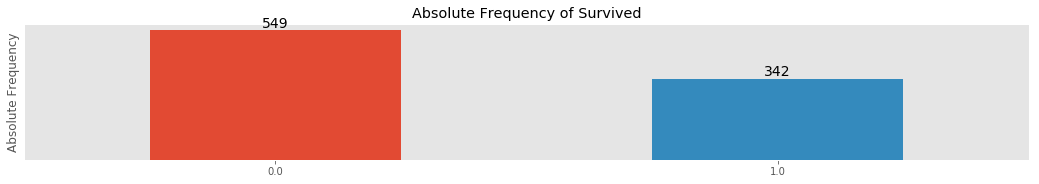

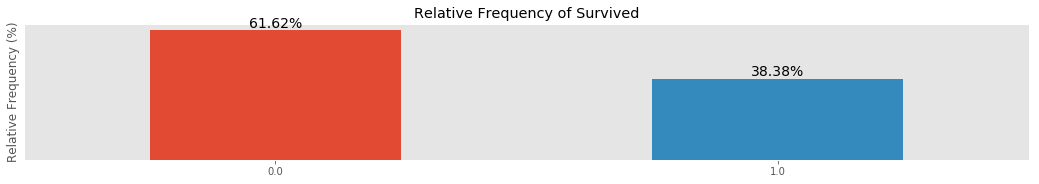

Absolute & Relative Frequency of Survived :


,Absolute Frequency,Relative Frequency(%)
0.0,549,61.62
1.0,342,38.38


In [8]:
'''Plot and count the number of survivors and victims in absolute and relative scale in the tragedy.'''
merged.Survived.agg(absolute_and_relative_freq, axis = 0)

**Findings:** Variable Survived is imbalanced since the proportion of survivors and victims is not equally represented in its distribution. Out of 891 passengers, only 342 passengers survived and a whopping 549 passengers died. Or put another way, 61.62% passengers died while just 38.38% of passengers were lucky enough to survive.

### 4.1.2 Sex <a id="4.1.2"></a>

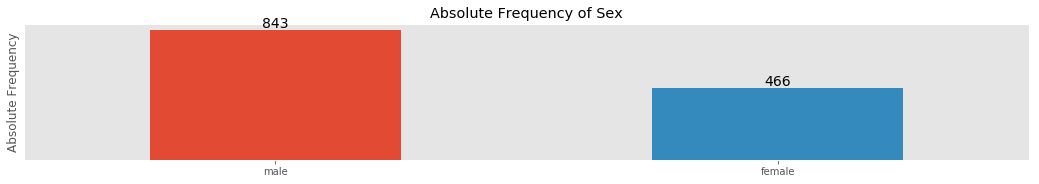

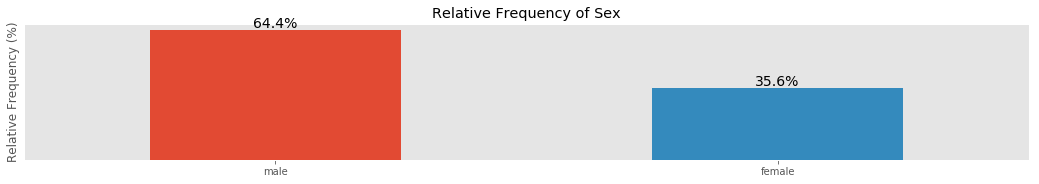

Absolute & Relative Frequency of Sex :


,Absolute Frequency,Relative Frequency(%)
male,843,64.4
female,466,35.6


In [9]:
'''Plot and count the absolute and relative frequency of Sex.'''
merged.Sex.agg(absolute_and_relative_freq)

**Findings:** Variable Sex is imbalanced as proportion of male vs female in its distribution are not equally represented. Rather Male(843) has outnumbered female (466) in variable Sex. Or, proportionally, over 64% of Sex variable consists of label male while female contibutes to only over 35.5% of Sex.

### 4.1.3 Pclass  <a id="4.1.3"></a>

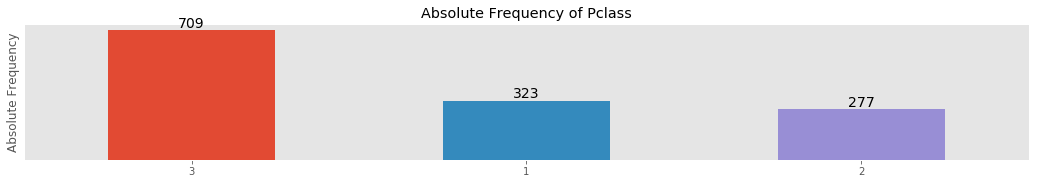

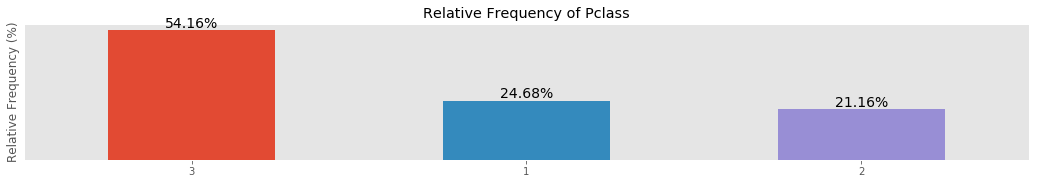

Absolute & Relative Frequency of Pclass :


,Absolute Frequency,Relative Frequency(%)
3,709,54.16
1,323,24.68
2,277,21.16


In [10]:
'''Plot and count the absolute and relative frequency of Pclass.'''
merged.Pclass.agg(absolute_and_relative_freq)

**Findings:** Again class distribution of Pclass is imbalanced as three categories of Pclass are not evenly represented in its distribution. 3 (Pclass3) is the most occured (709) levels of Pclass while 2 is the least occured (277). Another way of saying that, over  54% of Pclass variable consists of 3(Pclass3) while 1 and 2 both combinedly contribute to nearly 46% of Pclass.

### 4.1.4 Embarked  <a id="4.1.4"></a>

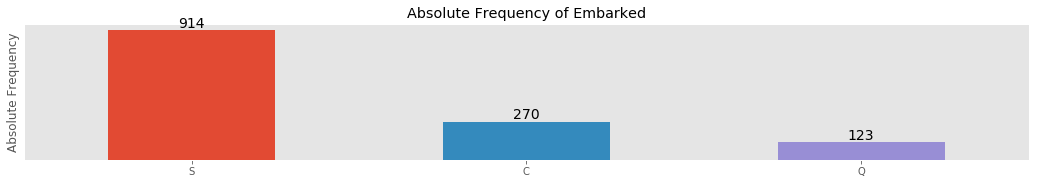

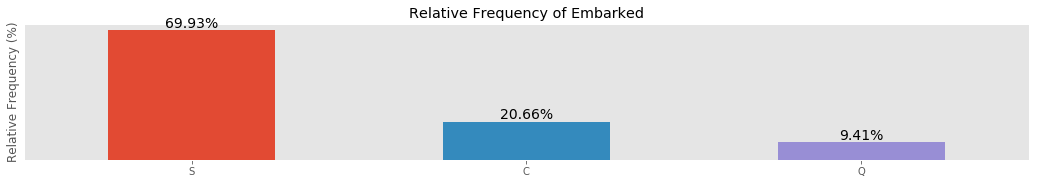

Absolute & Relative Frequency of Embarked :


,Absolute Frequency,Relative Frequency(%)
S,914,69.93
C,270,20.66
Q,123,9.41


In [11]:
'''Plot and count the absolute and relative frequency of Embarked.'''
merged.Embarked.agg(absolute_and_relative_freq)

**Findings:** Embarked is also imbalanced since its levels are not equally represented in its distribution. A whopping 914 passengers embarked from Southamton while just 123 embarked from Queenstown. In other words, almost 70% of Embarked consists of S while both C and Q contribute to 30 to Embarked.

### 4.1.5 Cabin <a id="4.1.5"></a>

In [12]:
'''Absolute frequency of Cabin.'''
abs_freq_cabin = merged.Cabin.value_counts(dropna = False)
bold('**Categories of Cabin:**')
display(abs_freq_cabin.head())

"""As frequency of Cabin isn't what we expected, let's count total categories in Cabin."""
bold('**Total categories in Cabin:**')
display(abs_freq_cabin.count())

'''Finally preview the variable Cabin to see what is causing the irregularity.'''
bold('**Preview Cabin:**')
display(merged.Cabin.head(7))

**Categories of Cabin:**

NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F2                    4
Name: Cabin, dtype: int64

**Total categories in Cabin:**

187

**Preview Cabin:**

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
Name: Cabin, dtype: object

**Findings:** Looks like Cabin is alphanumeric type variable with 1014 missing obsevations. There are 187 kinds of categories in variable Cabin. Since there are too many categories in Cabin, we must process (i.e., reduce the number of categories) Cabin to check if there is any association between Survived and Cabin.

### 4.1.6 Name <a id="4.1.6"></a>

In [13]:
'''Count total categories in Name.'''
bold('**Total categories in Name:**')
display(merged.Name.value_counts().count())

"""Let's finally check the what's inside the variable Name."""
bold('**Preview Name:**')
display(merged.Name.head())

**Total categories in Name:**

1307

**Preview Name:**

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

**Findings:** As expected Name contains strings that has 1307 variations. So, like Cabin, we must process Name to get any clue about survival from it.

### 4.1.7 Ticket  <a id="4.1.7"></a>

In [14]:
'''Count total groups in variable Ticket.'''
bold('**Total groups in Ticket:**')
display(merged.Ticket.value_counts().count())

'''Lets investigate Ticket.'''
bold('**Preview of Ticket:**')
display(merged.Ticket.head())

**Total groups in Ticket:**

929

**Preview of Ticket:**

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

**Findings:** It seems Ticket also has too many unique categories (929). Being an alphanumeric type variable, we must process Ticket to get any useful insights about survival.

### 4.1.8 SibSp  <a id="4.1.8"></a>

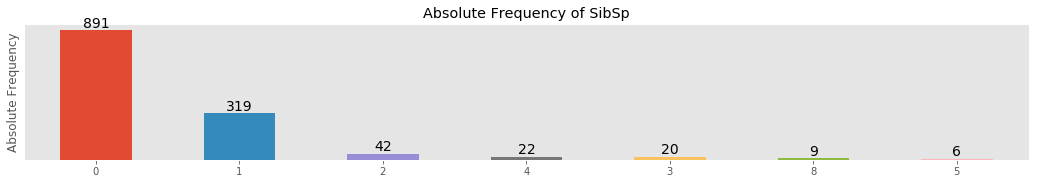

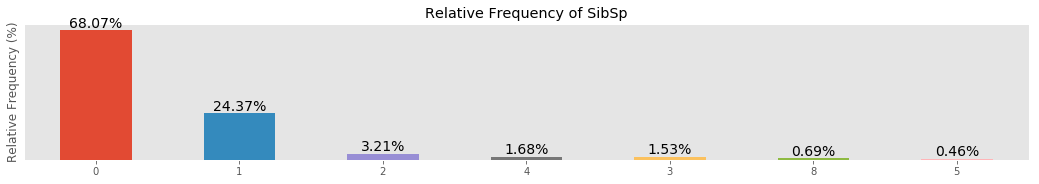

Absolute & Relative Frequency of SibSp :


,Absolute Frequency,Relative Frequency(%)
0,891,68.07
1,319,24.37
2,42,3.21
4,22,1.68
3,20,1.53
8,9,0.69
5,6,0.46


In [15]:
'''Plot and count the absolute and relative frequency of SibSp.'''
merged.SibSp.agg(absolute_and_relative_freq)

**Findings:** Once again, SibSp is not balanced as levels of SibSp(7) are not equally represented in its distribution. 891 passengers were without siblings or spouses. Put another way, over 68% passengers had no siblings or spouses aboard, followed by over 24% passengers had 1 siblings or spouse.

### 4.1.9 Parch  <a id="4.1.9"></a>

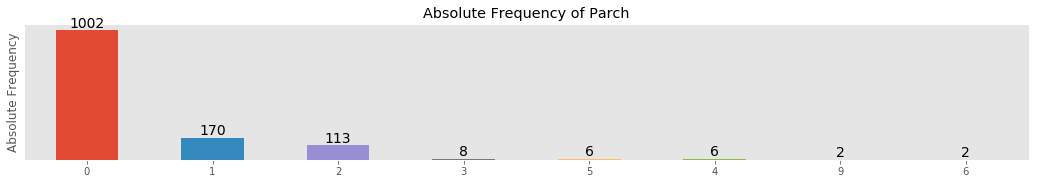

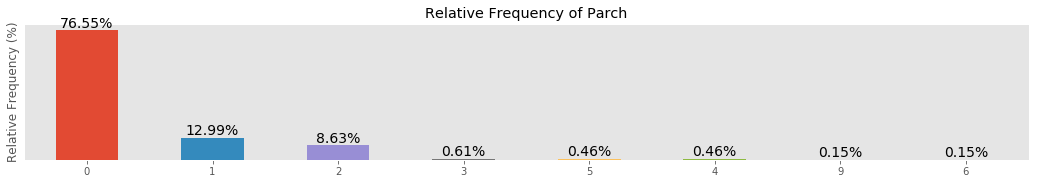

Absolute & Relative Frequency of Parch :


,Absolute Frequency,Relative Frequency(%)
0,1002,76.55
1,170,12.99
2,113,8.63
3,8,0.61
5,6,0.46
4,6,0.46
9,2,0.15
6,2,0.15


In [16]:
'''Plot and count the absolute and relative frequency of Parch.'''
merged.Parch.agg(absolute_and_relative_freq)

**Findings:** Parch isn't balanced as levels of Parch(8) are not equally represented in its distribution. Over one thousand passengers were without parents or children, followed by 170 passengers had one parents or children. In other words, over 76.5% passengers were without parents or children while rest of the 23.5% had few parents or children.

## 4.2 Numerical Variables <a id="4.2"></a>
Analyse numerical variables using summary statistics, histogram and density plots.

In [17]:
'''To analyse numerical variables, we will create two custom functions.
The 1st one will calculate summary statistics and plot histogram for each numerical variable.
And the 2nd function will plot kernel density plot and calculate skewness for each numerical variable.''' 

'''#1.Summary statistics with histogram'''
def summary_stats_and_hist(variable):
    global ax
    stats = variable.describe()
    ax = variable.plot.hist()
    plt.xlabel('%s' %variable.name)
    plt.title('Distribution of %s with Histogram' %variable.name)
    abs_bar_labels()
    print('Summary Statistics of', variable.name, ':')
    return display(stats)

'''#2.Density plot with skewness.'''
def density_plot_and_skewness(variable):
    variable.plot.hist(density = True)
    variable.plot.kde(style = 'k--')
    plt.xlabel('%s'%variable.name)
    plt.title('Distribution of %s with Density Plot & Histogram' %variable.name)
    print('Skewness of ', variable.name, ':')
    skewness = variable.skew()
    return display(skewness)

### 4.2.1 Fare <a id="4.2.1"></a>

Summary Statistics of Fare :


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

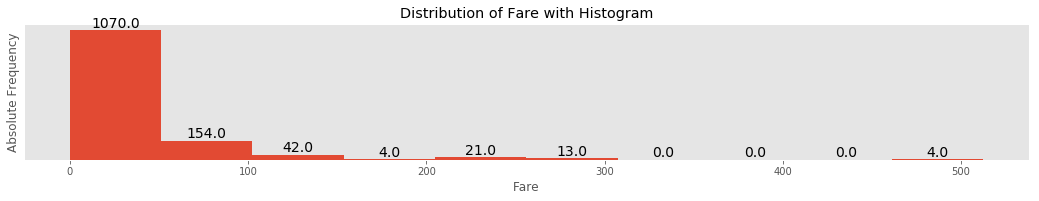

In [18]:
'''Calculate summary statistics of Fare with histogram.'''
merged.Fare.agg(summary_stats_and_hist)

**Reading the histogram, it's clear that Fare's distribution has a high positive skewness. And it seems most of the passengers (1070) paid for fare between 0 to 51, followed by 51 to 102.**

There is also another, often clearer, way to grasp the distribution: density plots or, more formally, Kernel Density Plots. They can be considered a smoothed version of the histogram. One advantage of density plot over histogram is that its shape of distribution isn't affected by the number of bins used.

Skewness of  Fare :


4.367709134122922

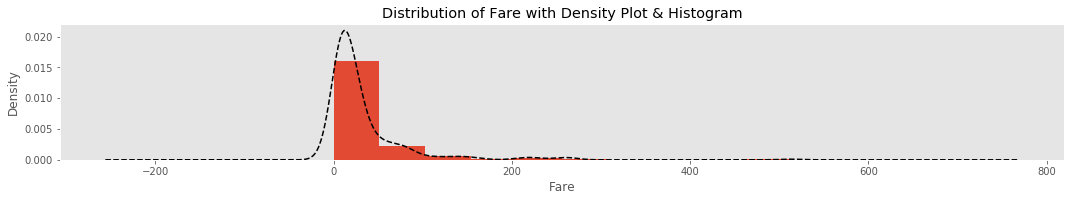

In [19]:
'''Plot density plot of Fare and calculate skewness.'''
merged.Fare.agg(density_plot_and_skewness)

**So what does the  value of skewness suggest?**
1. If skewness is less than −1 or greater than +1, the distribution can be considered as highly skewed.
2. If skewness is between −1 and −½ or between +½ and +1, the distribution can be considered as moderately skewed.
3. And finally if skewness is between −½ and +½, the distribution can be considered as approximately symmetric.    

**Findings:** Density plot shows the mass of the distribution of Fare is heavily concentrated on the left of the figure due to very long tail on the right side. So it can be said that Fare is substantially skewed(positively) that is also supported by the calculated positive value of skewness of 4.368


### 4.2.2 Age <a id="4.2.2"></a>

Summary Statistics of Age :


count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

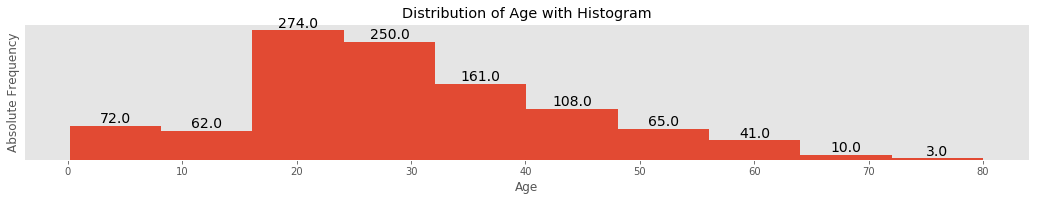

In [20]:
'''Calculate summary statistics of Age with histogram.'''
merged.Age.agg(summary_stats_and_hist)

**At first glance, Age seems to be positively skewed (slightly). 344 passengers' age is between 20 to 30(not including 30). And passengers between age 70 to 80(including 80 = 8) were the least.**

Skewness of  Age :


0.40767455974362266

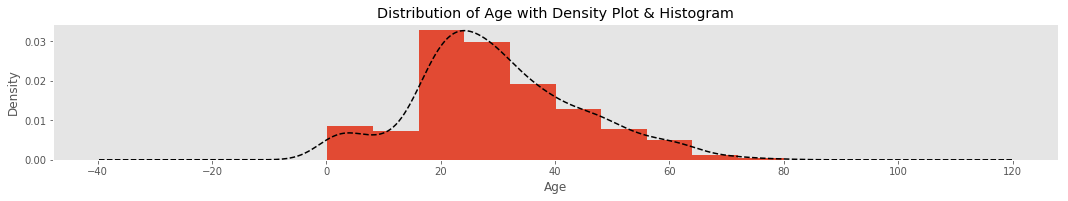

In [21]:
'''Plot density plot of Age and calculate skewness.'''
merged.Age.agg(density_plot_and_skewness)

**Findings:** What we can see from the density plot is that the mass of the distribution of Age is slightly concentrated on the left of the figure due to comparatively long tail on the right side. So it can be said that Age is almost normally distributed since the tail on the both sides are almost equal and it has a small value of positive skewness of 0.40767 (in between -0.5 to 0.5). So it can be said that Age is almost normally distributed.

### 4.2.3 PassengerId <a id="4.2.3"></a>

In [22]:
'''What does passengerId contain?'''
display(merged.PassengerId.head())

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

**Findings:** PassengersId is an unique identity number (positive integer) assigned to each passenger.

# 5.Feature Engineering <a id="5"></a>
In this section, we would either modify or create new features from the exsisting features which are otherwise hard to analyse analysed in their raw forms that we saw in Univariate Analysis section. We would engineer features like Cabin, Name, SibSp & Parch, and Ticket that could tell us something about survival or death once they're processed.

## 5.1 Process Cabin <a id="5.1"></a>

In [23]:
"""Let's preview the Cabin again."""
bold('**Cabin preview:**')
display(merged.Cabin.head())

"""It seems Cabin contains some missing values. Let's count them."""
bold('**Missing values in Cabin:**')
display(merged.Cabin.isnull().sum())

'''Total categories in Cabin before processing.'''
bold('**Total categories in Cabin before processing:**')
display(merged.Cabin.value_counts(dropna = False).count())

**Cabin preview:**

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

**Missing values in Cabin:**

1014

**Total categories in Cabin before processing:**

187

Looks like Cabin is alphanumeric type variable with no special characters (like ., /, % etc) between letters and numbers. It has also 1014 missing obsevations. It is reasonable to presume that those NaNs didn't have a cabin, which could tell us something about 'Survived'. We will flag NaN as 'X' and keep only the 1st character where Cabin has alphanumeric values. Since its a categorical variable, we must reduce the number of categories for further analysis.

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

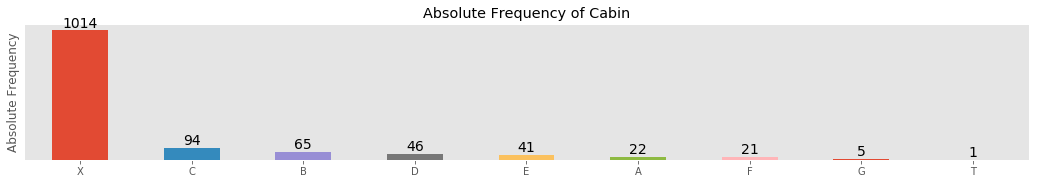

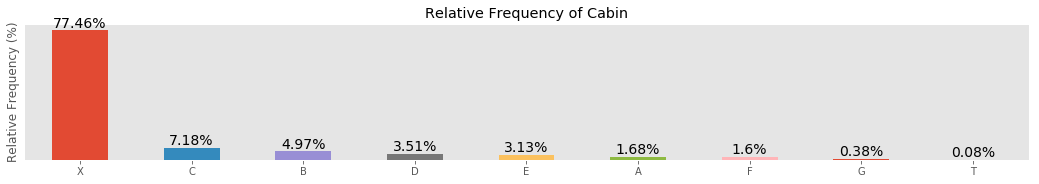

Absolute & Relative Frequency of Cabin :


,Absolute Frequency,Relative Frequency(%)
X,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [24]:
"""Flag all the NaNs of Cabin as 'X'."""
merged.Cabin.fillna(value = 'X', inplace = True)

'''Keep only the 1st character where Cabin is alphanumerical.'''
merged.Cabin = merged.Cabin.apply( lambda x : x[0])
display(merged.Cabin.value_counts())

'''After processing, we can visualize the absolute and relative frequency of newly transformed Cabin variable.'''
merged.Cabin.agg(absolute_and_relative_freq)

**Findings:** It seems nearly 77.5% of passengers had X cabin category (formerly NaNs), followed by over 7% had cabin category C and nearly 5% had cabin category B.

## 5.2 Process Name <a id="5.2"></a>

In [25]:
"""Lets see what's inside the Name."""
display(merged.Name.head(8))

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
Name: Name, dtype: object

What we can easily understand from this column, it contains strings that further contains titles such as Mr, Mrs, Master etc. These titles give us some useful information about sex(Mr = male, Mrs = married female), age(Miss is usually younger than Mrs), and profession(Master indicates profession and hence social status) etc which in the end could tell us something more about survival. Now we want to extract these titles from Name to check if there is any association between these titles and Survived.

In [26]:
'''Create a new variable Title that extracts titles from Name.'''
merged['Title'] = merged.Name.str.extract('([A-Za-z]+)\.')

'''Count the extracted categories of Title from Name.'''
display(merged.Title.value_counts())

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Lady          1
Capt          1
Don           1
Dona          1
Countess      1
Jonkheer      1
Sir           1
Mme           1
Name: Title, dtype: int64

We can see there are several titles with the very least frequency. So, it makes sense to put them in fewer buckets. Professionals like Dr, Rev, Col, Major, Capt will be put into 'Officer' bucket. Titles such as Dona, Jonkheer, Countess, Sir, Lady, Don were usually entitled to the aristocrats and hence these titles will be put into bucket 'Aristocrat'. We would also replace Mlle and Ms with Miss and Mme by Mrs as these are French titles.

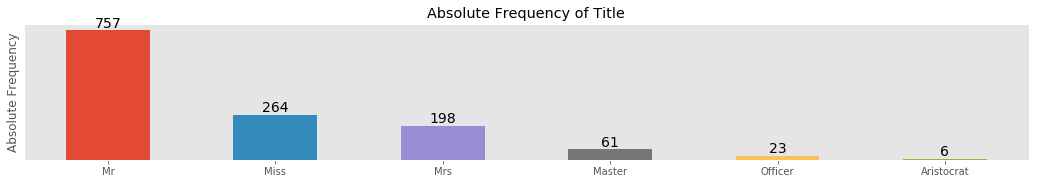

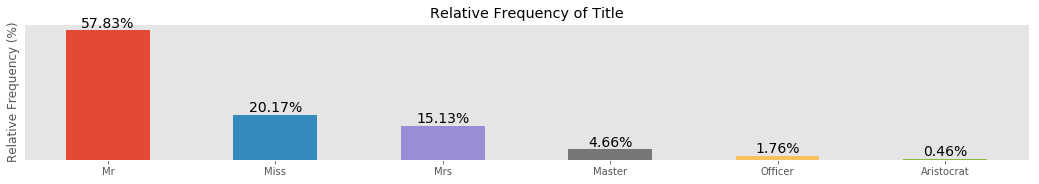

Absolute & Relative Frequency of Title :


,Absolute Frequency,Relative Frequency(%)
Mr,757,57.83
Miss,264,20.17
Mrs,198,15.13
Master,61,4.66
Officer,23,1.76
Aristocrat,6,0.46


In [27]:
'''Create a bucket Officer and put Dr, Rev, Col, Major, Capt titles into it.'''
merged.Title.replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)

'''Put Dona, Jonkheer, Countess, Sir, Lady, Don in bucket Aristocrat.'''
merged.Title.replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)

'''Finally Replace Mlle and Ms with Miss. And Mme with Mrs.'''
merged.Title.replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

'''After processing, visualise and count absolute and relative frequency of transformed Title.'''
merged.Title.agg(absolute_and_relative_freq)

**Findings:** Nearly 58% passengers had title Mr(male of course), followed by over 20% passengers had titles Miss(unmarried women hence usually younger than Mrs). Just over 15% passengers were married women (Mrs).

## 5.3 Process SibSp & Parch <a id="5.3"></a>
In univariate analysis, we saw some passengers had siblings/spouses and some didn't have. The same is also true for variable Parch. Since these two variables together indicate the size of a family, we would create a new variable 'Family_size' from these two variables.

In [28]:
'''Merge SibSp and Parch to create a variable Family_size.'''
merged['Family_size'] = merged.SibSp + merged.Parch + 1  # Adding 1 for single person
display(merged.Family_size.value_counts())

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_size, dtype: int64

We see there are several family sizes with the very least frequency. So its sensible to put them in a fewer buckets. We will create 4 buckets namely single, small, medium, and large for rest of them.

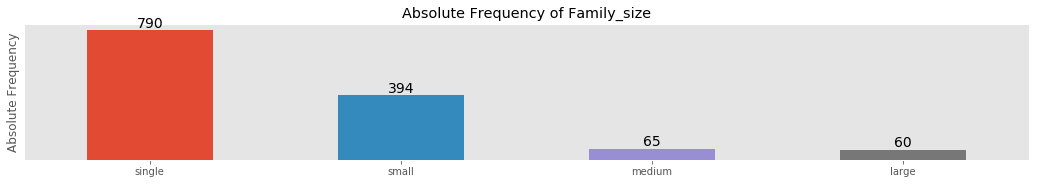

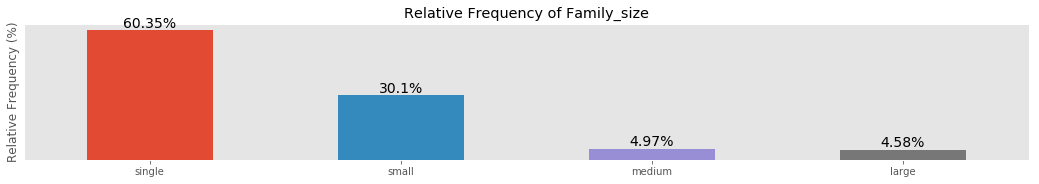

Absolute & Relative Frequency of Family_size :


,Absolute Frequency,Relative Frequency(%)
single,790,60.35
small,394,30.10
medium,65,4.97
large,60,4.58


In [29]:
'''Create buckets of single, small, medium, and large and then put respective values into them.'''
merged.Family_size.replace(to_replace = [1], value = 'single', inplace = True)
merged.Family_size.replace(to_replace = [2,3], value = 'small', inplace = True)
merged.Family_size.replace(to_replace = [4,5], value = 'medium', inplace = True)
merged.Family_size.replace(to_replace = [6, 7, 8, 11], value = 'large', inplace = True)

'''After processing, visualise and count the absolute and relative frequency of engineered Family_size.'''
merged.Family_size.agg(absolute_and_relative_freq)

**Findings:** Looks like most of the passengers (over 60%) were single(without family), followed by 30% passengers had a small family. Almost 5% passengers had medium families and just over 4.5% passengers had large families abroad.

## 5.4 Process Ticket <a id="5.4"></a>

In [30]:
"""Let's preview the variable Ticket first."""
display(merged.Ticket.head())

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

Ticket is also an alphanumeric type variable. We will create two groups-one will contain just number and other will only contain character extracted from string. If a row contains both character and number, we will keep only character.

In [31]:
'''Assign N if there is only number and no character. If there is a character, extract the character only.'''
ticket = []
for x in list(merged.Ticket):
    if x.isdigit():
        ticket.append('N')
    else:
        ticket.append(x.replace('.','').replace('/','').strip().split(' ')[0])
        
'''Swap values'''
merged.Ticket = ticket

'''Count the categories in Ticket.'''
bold('**Categories of Ticket:**')
display(merged.Ticket.value_counts())

**Categories of Ticket:**

N          957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
STONO       14
SCPARIS     14
A4          10
FCC          9
C            8
SOC          8
STONO2       7
SOPP         7
SCParis      5
SCAH         5
LINE         4
WEP          4
PP           4
FC           3
SOTONO2      3
SWPP         2
PPP          2
SC           2
SCA4         2
SOP          1
A            1
CASOTON      1
SP           1
AS           1
AQ3          1
STONOQ       1
SCOW         1
AQ4          1
Fa           1
LP           1
SCA3         1
Name: Ticket, dtype: int64

Still there are too many categories to deal with. Let's keep only the 1st character of Ticket to further reduce the classes of Ticket.

N    957
P     98
S     98
C     77
A     42
W     19
F     13
L      5
Name: Ticket, dtype: int64

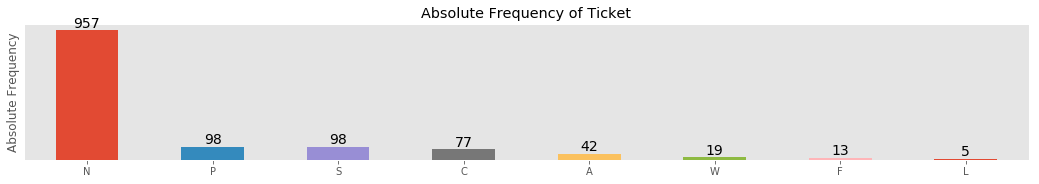

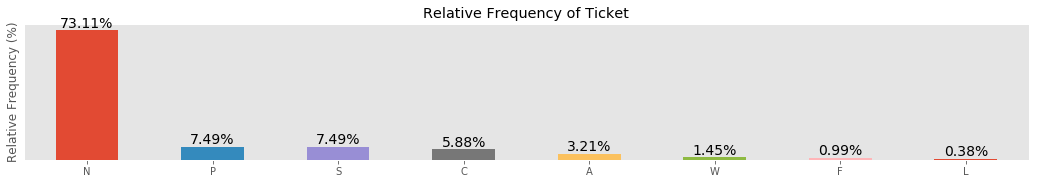

Absolute & Relative Frequency of Ticket :


,Absolute Frequency,Relative Frequency(%)
N,957,73.11
P,98,7.49
S,98,7.49
C,77,5.88
A,42,3.21
W,19,1.45
F,13,0.99
L,5,0.38


In [32]:
'''Keep only the 1st character of Ticket to further reduce the Ticket categories.'''
merged.Ticket = merged.Ticket.apply(lambda x : x[0])
display(merged.Ticket.value_counts())

'''After processing, visualise and count the absolute and relative frequency of updated Ticket.'''
merged.Ticket.agg(absolute_and_relative_freq)

**Findings:** Over 73% passengers had ticket of category N, followed by nearly 7.5% passengers ticket category were S and P. Passengers with W ticket category were as low as 1.45%.

# 6.Outliers Detection <a id="6"></a>
**How outliers affect the distribution:** If a value of a variable is significantly above the expected range, it will drag the distribution to the right, making the graph right-skewed or positive-skewed (like Fare). Alternatively, If a value is significantly below the expected range, it will drag the distribution to the left, making the graph left-skewed or negative-skewed.

Another useful plot for visualizing a continuous variable is box plot. Box plot is particularly helpful to understand the spread of the continus data and whether there are potential unusual observations (outliers) in that variable. It presents information of min, 1st quartile, 2nd quartile(median), 3rd quartile, and max of a variable. **We will use IQR method to detect the outliers for variable Age and Fare though we won't remove them.**

In [33]:
'''Create a function to count total outliers. And plot variables with and without outliers.'''
def outliers(variable):
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2,1)
    
    # Gives space between two subplots
    fig.subplots_adjust(hspace = 1) 
    
    # Plot variable with outliers
    variable.plot.box(vert = False, color = 'coral', grid = False, ax = ax1, title = 'Distribution with Outliers for %s' %variable.name)

    # Plot variable without outliers
    filtered.plot.box(vert = False, color = 'coral', grid = False, ax = ax2, title = 'Distribution without Outliers for %s' %variable.name)

## 6.1 Outliers Detection of Age <a id="6.1"></a>

Total Outliers of Age : 9


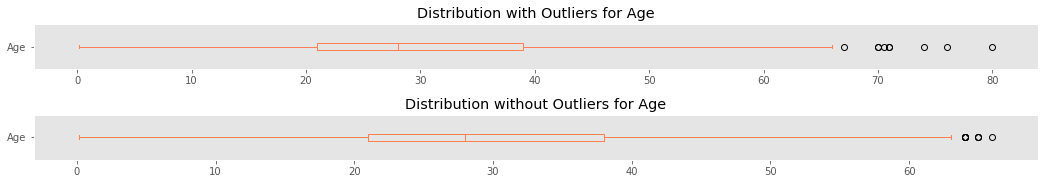

In [34]:
'''Count total outliers of Age. Plot Age with and without outliers.'''
merged.Age.agg(outliers)

**We count 9 outliers but boxplot shows 7 because 70 and 71 have duplicates.**

**For a box plot, if the longer part of the box is right (or above) to the median, the data is said to be skewed right. If the longer part is  left (or below) to the median, the data is skewed left. In our case, the bigger part of the box is right to the median**

## 6.2 Outliers Detection for Fare <a id="6.2"></a>

Total Outliers of Fare : 171


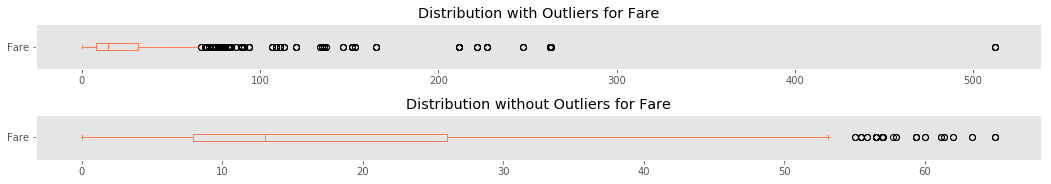

In [35]:
'''Count total outliers of Fare. Plot Fare with and without outliers.'''
merged.Fare.agg(outliers)

# 7.Imputing Missing Variables <a id="7"></a>
The simpliest way to impute missing values of a variable is to impute its missing values with its mean, median or mode depending on its distribution and variable type(categorical or numerical). By now, we should have a good idea about the distribution of the variables and the presence of outliers in those variables. For categorical variables mode-imputation is performed and for numerical variable mean-impuation is performed if its distribution is symmetric(or almost symmetric or normal like Age). On the other hand, for a variable with skewed distribution and outliers (like Fare), meadian-imputation is recommended as median is more immune to outliers than mean. 

However, one clear disadvantage of using mean, median or mode to impute missing values is the addition of bias if the amount of missing values is significant (like Age). So simply replacing them with the mean or the median age might not be the best solution since the age may differ by groups and categories of passengers.

To solve this, we can group our data by some variables that have no missing values and for each subset compute the median age to impute the missing values. Or we can build a linear regression model that will predict missing values of Age using the features that have no missing values. These two methods may result in better accuracy without high bias, unless a missing value is expected to have a very high variance. We will show the former method of imputation.

*Let's first look for  variables with the missing values.*

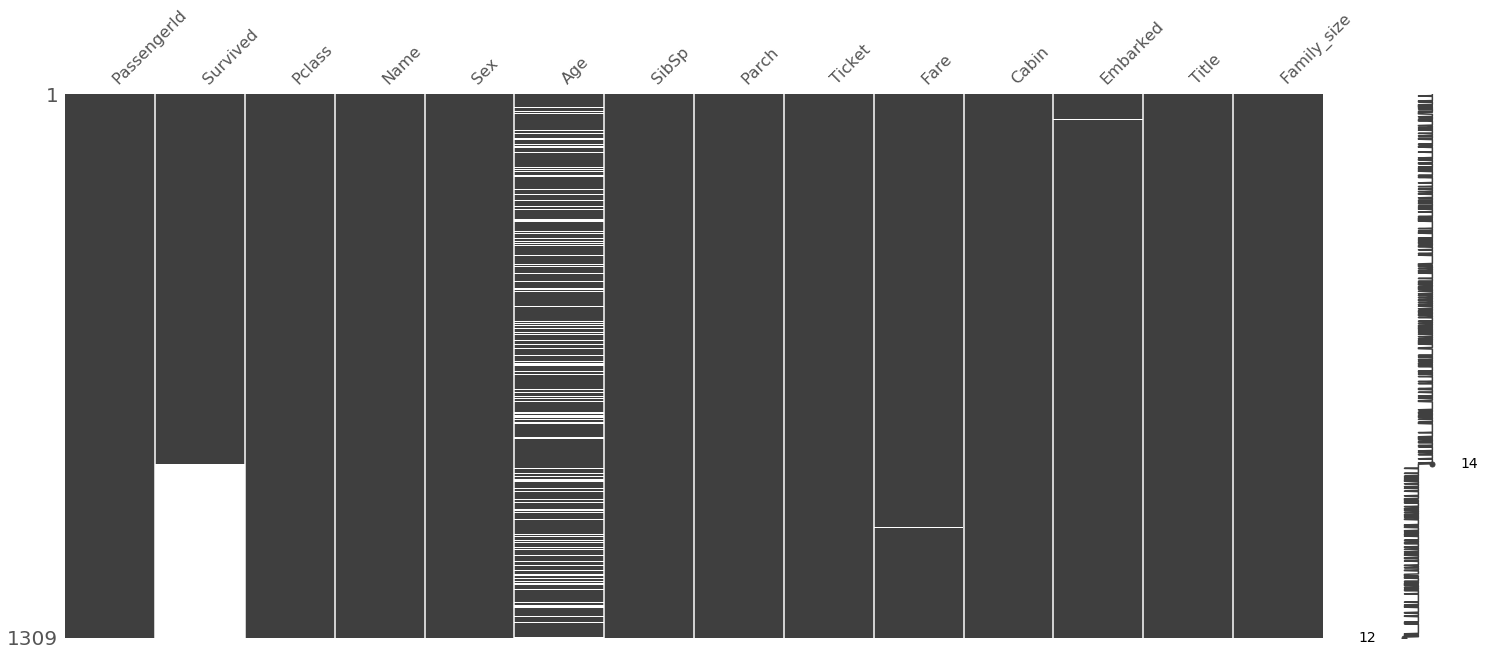

In [36]:
'''We can visualize the missing values for each variable.'''
mn.matrix(merged)
plt.show()

**The above ultaviolet plot delivers the most noise for Survived, followed by Age, Embarked and Fare.**

In [37]:
"""Let's count the missing values for each variable."""
bold('**Missing values for each variable:**')
display(merged.isnull().sum())

**Missing values for each variable:**

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
Title            0
Family_size      0
dtype: int64

**Findings:** 
1. Age has 263 missing values.
2. Fare has only 1.
3. Cabin has a whopping 1014 missing values.
4. Embarked has just 2 missing values.
5. *Finally Survived has missing values (due to concatenation of train and test set) that we would predict learning from train set.*

Remember we have total 1309 observations except Survived.

## 7.1 Impute Embarked & Fare <a id="7.1"></a>

In [38]:
'''Impute missing values of Embarked. Embarked is a categorical variable where S is the most frequent.'''
merged.Embarked.fillna(value = 'S', inplace = True)

'''Impute missing values of Fare. Fare is a numerical variable with outliers. Hence it will be imputed by median.'''
merged.Fare.fillna(value = merged.Fare.median(), inplace = True)

## 7.2 Impute Age <a id="7.2"></a>
To impute Age with grouped median, we need to know which features are correlated with Age. Let's find out the variables correlated with Age.

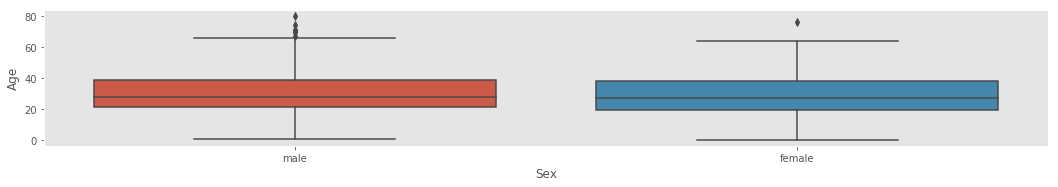

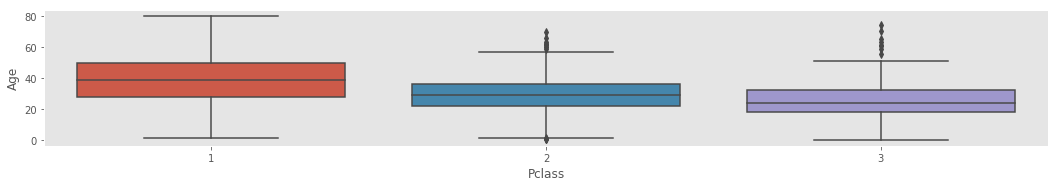

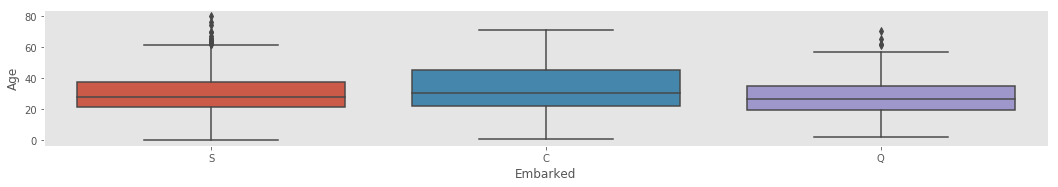

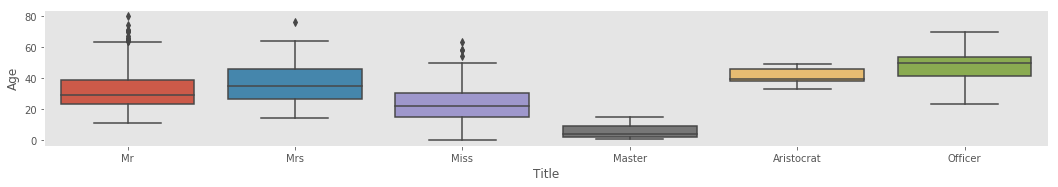

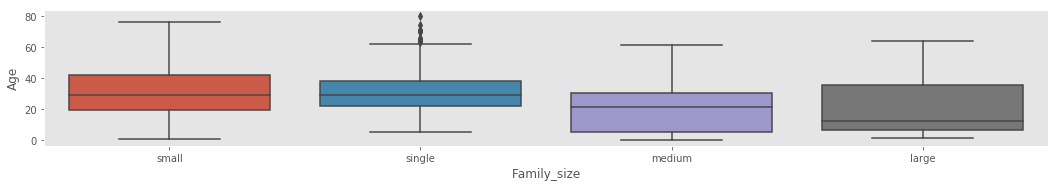

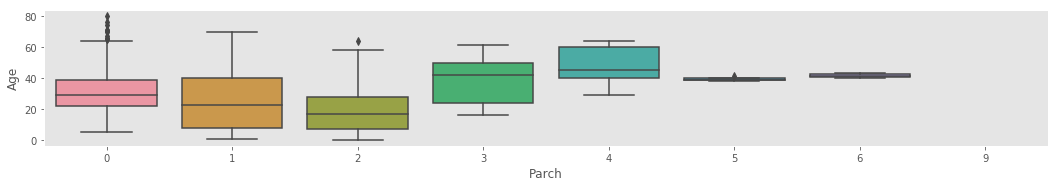

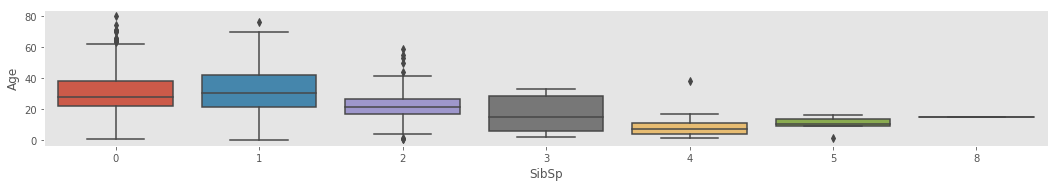

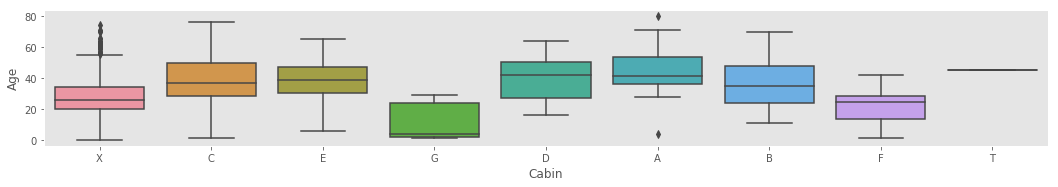

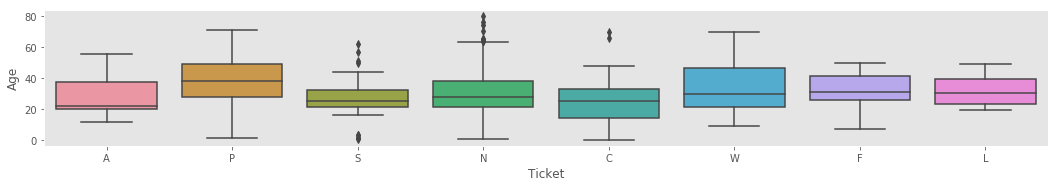

In [39]:
"""Create a boxplot to view the variables correlated with Age. First take the variables we're interested in."""
correlation = merged.loc[:, ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_size', 'Parch', 'SibSp', 'Cabin', 'Ticket']]
for columns in correlation:
    plt.figure(columns)
    sns.boxplot(x = columns, y = merged.Age, data = correlation)

**Findings:** 
1. Age distribution seems to be the same in male and female subpopulations and S, C, Q subpopulations of Embarked. So Sex and Embarked aren't good predictors for Age.
2. On the other hand, Age distribution seems to be distinct in Pclass's 1, 2 and 3 subpopulations, so Pclass is informative to predict Age.
3. Finally, Age distribution seems to be distinct in different categories for Title, Family_size, SibSp, Parch, and Cabin. So they might be good predictor for Age.

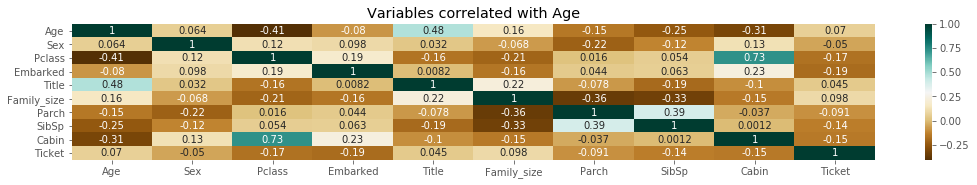

In [40]:
"""Let's plot correlation heatmap to see which variable is highly correlated with Age and if our boxplot interpretation holds true. We need to convert categorical variable into numerical to plot correlation heatmap. So convert categorical variables into numerical."""

from sklearn.preprocessing import LabelEncoder
correlation = correlation.agg(LabelEncoder().fit_transform)
correlation['Age'] = merged.Age # Inserting Age in dataframe correlation
correlation = correlation.set_index('Age').reset_index() # Move Age at index 0.

'''Now create the heatmap correlation.'''
sns.heatmap(correlation.corr(), cmap ='BrBG', annot = True)
plt.title('Variables correlated with Age')
plt.show()

**Findings:** As expected Sex, Embarked, and Ticket have the weakest correlation with Age what we could guess beforehand from boxplot. Parch and Family_size are moderately correlated with Age. Title, Pclass, Cabin, and SibSp have the highest correlation with Age. But we are gonna use Title and Pclass only in order to impute Age since they have the strongest correlation with Age. So the tactic is to impute missing values of Age with the median age of similar rows according to Title and Pclass.

In [41]:
'''Impute Age with median of respective columns (Title and Pclass).'''
merged.Age = merged.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

'''So by now we should have no variables with missing values.'''
bold('**Missing values after imputation:**')
display(merged.isnull().sum())

**Missing values after imputation:**

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
Family_size      0
dtype: int64

# 8.Bivariate Analysis <a id="8"></a>
Being the most important part, bivariate analysis tries to find the relationship between two variables. We will look for correlation or association between our predictor and target variables. Bivariate analysis is performed for any combination of categorical and numerical variables. The combination can be: Numerical & Numerical, Numerical & Categorical and Categorical & Categorical. Different methods are used to tackle these combinations during analysis process. The methods are:
1. Numerical & Numerical: Pearson's correlation, or Spearman correlation (doesn't require normal distribution).
2. Numerical & Categorical: Point biserial correlation (only  if categorical variable is binary type), or ANOVA test. For this problem, you can use either biserial correlation or ANOVA. But I will perform both test just to learn because ANOVA will come in handy if categorical variable has more than two groups.
3. Categorical & Categorical: We would use Chi-square test for bivariate analysis between categorical variables.

## 8.1 Numerical & Categorical Variables <a id="8.1"></a>
First we create a boxplot between our numerical and categorical variables to check if the distribution of numerical variable is distinct in different class of nominal variables. Then we find the mean of numerical variable for every class of categorical variable. Again we plot a histogram of numerical variable for every class of categorical variable. Finally anova or point biserial correlation (in case of two class categorical variable) is calculated to find association between nominal and numerical variables.   

In [42]:
"""Let's split the train and test data for bivariate analysis since test data has no Survived values. We need our target variable without missing values to conduct the association test with predictor variables."""
df_train = merged.iloc[:891, :]
df_test = merged.iloc[891:, :]
df_test = df_test.drop(columns = ['Survived'], axis = 1)

'''#1.Create a function that creates boxplot between categorical and numerical variables and calculates biserial correlation.'''
def boxplot_and_correlation(cat,nume):
    '''cat = categorical variable, and nume = numerical variable.'''
    ax = sns.boxplot(x = cat, y = nume)
    
    # Select boxes to change the color
    box = ax.artists[0]
    box1 = ax.artists[1]
    
    # Change the appearance of that box
    box.set_facecolor('red')
    box1.set_facecolor('green')
    
    plt.title('Association between Survived & Fare %s' %nume.name)
    print('Correlation between', nume.name, 'and', cat.name,':', stats.pointbiserialr(nume, cat))
    plt.show()
    return display(ax)

'''#2.Create another function to calculate mean when grouped by categorical variable. And also plot the grouped mean.'''
def nume_grouped_by_cat(nume, cat):
    global ax
    grouped_by_cat = nume.groupby(cat).mean().sort_values( ascending = False)
    grouped_by_cat.rename ({1:'survived', 0:'died'}, axis = 'rows', inplace = True) # Renaming index
    grouped_by_cat = round(grouped_by_cat, 2)
    ax = grouped_by_cat.plot.bar() 
    abs_bar_labels()
    plt.ylabel('Mean %s' %nume.name)
    plt.title('Survivors vs Victims Mean %s' %nume.name)
    print('Mean', nume.name, 'of Survivors vs Victims:')
    return display(grouped_by_cat)

'''#3.This function plots histogram of numerical variable for every class of categorical variable.'''
def nume_hist_by_cat(nume,cat):
    nume[cat == 1].hist(color = ['g'], grid = False)
    nume[cat == 0].hist(color = ['r'], grid = False)
    plt.yticks([])
    plt.xlabel('%s' %nume.name)
    plt.title('Survivors vs Victims Distribution of %s' %nume.name)
    
'''#4.Create a function to calculate anova between numerical and categorical variable.'''
def anova(nume, cat):
    from scipy import stats
    grp_nume_by_cat_1 = nume[cat == 1] # Group our numerical variable by categorical variable(1). Group Fair by survivors
    grp_nume_by_cat_0 = nume[cat == 0] # Group our numerical variable by categorical variable(0). Group Fare by victims
    f_val, p_val = stats.f_oneway(grp_nume_by_cat_1, grp_nume_by_cat_0) # Calculate f statistics and p value
    print('Anova results:', f_val, p_val)  
    
'''#5.Create another function that calculates Tukey's test between our nemurical and categorical variable.'''
def tukey_test(nume, cat):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(endog = nume,  # Numerical data
                             groups = cat,   # Categorical data
                             alpha = 0.05)   # Significance level
    
    summary = tukey.summary()   # See test summary
    return display(summary)        

### 8.1.1 Fare & Survived <a id="8.1.1"></a>

Correlation between Fare and Survived : PointbiserialrResult(correlation=0.25730652238496243, pvalue=6.120189341921873e-15)


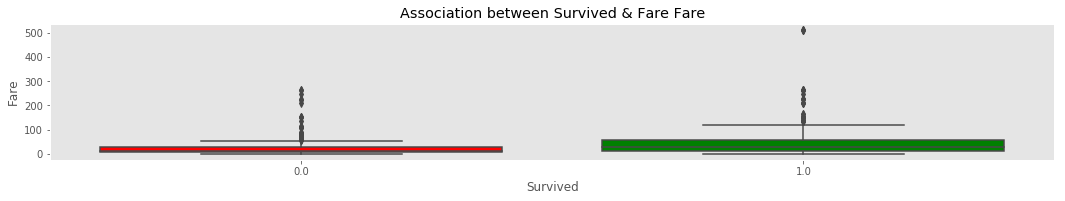

In [43]:
'''Create a boxplot to visualize the strength of association of Survived with Fare. Also calculate biserial correlation.'''
boxplot_and_correlation(df_train.Survived, df_train.Fare)

**Findings:** The distribution of Fare between different categories of Survived (0 and 1) are distinct (very least overlap) that makes it comparatively strong predictor for Survived what is kind of true from the correlation value of  0.257307 and the p value (less than 0.01) that suggests we're 99% confident that this correlation is statistically significant. Also survival is positively correlated to Fare, so the more you pay for fare, the more your chances are to survive that is quite evident from the box plot.

Mean Fare of Survivors vs Victims:


Survived
survived    48.40
died        22.12
Name: Fare, dtype: float64

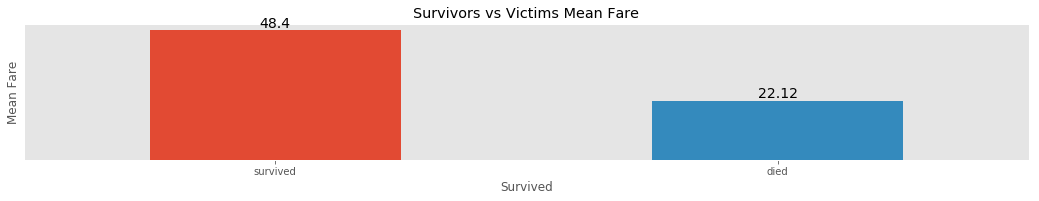

In [44]:
'''So the mean fare of survivors should be much more (positive correlation or boxplot interpretation) than those who died. Calculate mean fare paid by the survivors as well as by the victims.'''
nume_grouped_by_cat(df_train.Fare, df_train.Survived)

**Looks like, on average, if you pay more for your ticket, you are more likely to survive. Let's plot histogram of survivors and victims fare together to validate our intuition:**

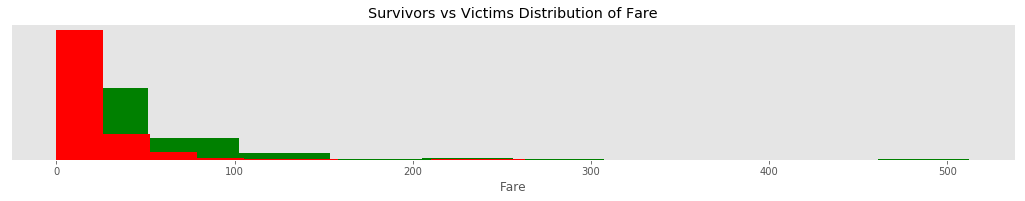

In [45]:
"""Plot histogram of survivor's vs victims fare."""
nume_hist_by_cat(df_train.Fare, df_train.Survived)

**That's true. Passengers who paid more for their fair, mostly survived.**

**ANOVA:** 
The ANOVA(ANalysis Of VAriance) test lets us check whether a numeric response variable varies according to the levels (or class) of a categorical variable. When we simply refer to 'ANOVA', we usually mean the 'one way' ANOVA which is a test for exploring the impact of one single factor on three or more groups (but two groups would also do, as we explain below).

Though one should use either point biserial correlation (if categorical variable is of binary type) or ANOVA method for this problem to find any association between a categorical and a numerical variable, I would perform ANOVA too to have an intuition of how ANOVA works. Though ANOVA is usually prefered if the categorical variable having more than two groups, it is also possible to perform ANOVA for a categorical variable with two groups.

The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable. It essentially answers the question: do any of the group means differ from one another? The null hypothesis is all of the group means are equal. And the alternate hypothesis is any of the group means differ from one another.

In [46]:
"""Let's perform ANOVA between Fare and Survived. One can omit this step. I perform just to show how anova is performed if there were more than two groups in our categorical variable."""
anova(df_train.Fare, df_train.Survived)

Anova results: 63.03076422804448 6.120189341921873e-15


**Interpretation of ANOVA result:**
As p < 0.05 we state that we have a main interaction effect. This simply means that amongst the groups at least any of the group(or groups) means statistically significantly  differ from one another (true for only more than two groups). However, this result does not identify the sample pair (or pairs) which cause this significance (again true for more than two groups of categorical variable but we have just two groups..i.e., 0 and 1).
So, when ANOVA reports 'interaction effect' we need to further identify the group pairs by applying pair-wise controls(required for more than two groups of categorical variable). Although these controls could be done by implementing ordinary t-test but this is not the right approach. So a post hoc-test ( usually Tukey's test) is performed to find the pair or pairs that cause the difference. Though Tukey's test is not required with a categorical variable less than three groups. But I perform it so that you could perform if there were three groups.

***Note:*** Tukey's test is not required if ANOVA gives a p value greater than 0.05 and nominal variable has less than three groups.

In [47]:
"""Perform Tukey's test using pairwise_tukeyhsd() function. One can omit Anova and Tukey's test for categorical variable less than three levels by performing biserial correlation."""
tukey_test(df_train.Fare, df_train.Survived)

group1,group2,meandiff,lower,upper,reject
0.0,1.0,26.2775,19.7815,32.7735,True


** 'True' in the reject column indicates that there is  statistically significant difference  ("true" to reject the null hypothesis) between groups in the 0-1 pair, i.e., it can be said survial rate is statistically associated with Fare.** 

### 8.1.2 Age & Survived <a id="8.1.2"></a>

Correlation between Age and Survived : PointbiserialrResult(correlation=-0.05953689941956393, pvalue=0.07569419096180038)


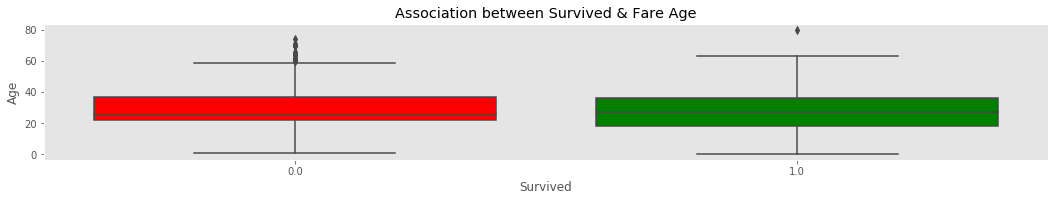

In [48]:
"""Let's create a box plot between Age and Survived to have an idea by how much Age is associated with Survived. Also find point biserial correlation between them."""
boxplot_and_correlation(df_train.Survived, df_train.Age)

**Findings:** Box plot shows the distribution of Age between categories of Survived (1 and 0) has significant overlap which is also kind of true from a small correlation value of -0.05939. And a p value greater than 0.05 indicates that there is no evidence that the correlation is statistically significant. As we can see that Survived is inversly correlated to Age, so if you are younger, you are just likely to survive.

Mean Age of Survivors vs Victims:


Survived
died        29.84
survived    28.18
Name: Age, dtype: float64

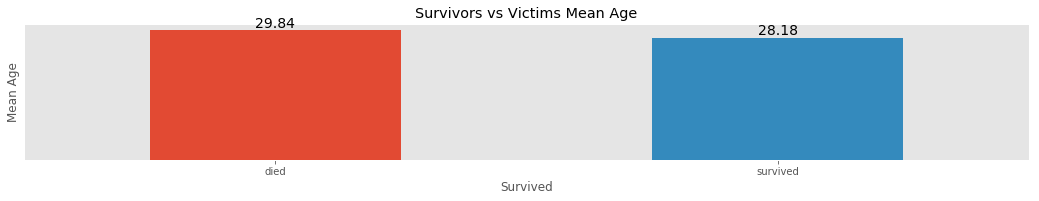

In [49]:
'''So the mean age of survivors should be just less than those who died (small negative correlation and reading boxplot). Calculate the mean age of survivors and victims.'''
nume_grouped_by_cat(df_train.Age, df_train.Survived)

**Analysing box and above bar plot, we have a feeling that younger people, on average, were just more likely to survive. Let's plot one histogram of survivors' age and another of victims' age to validate our intuition.**

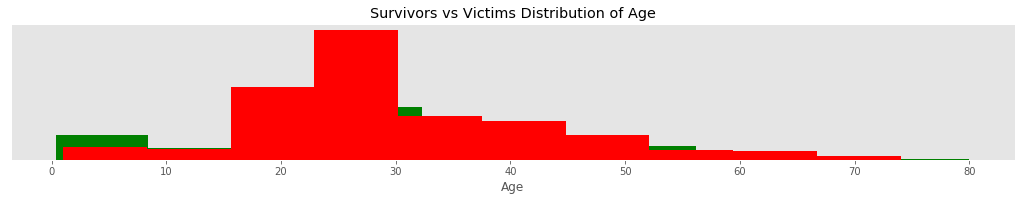

In [50]:
'''Histogram of survivors vs victims age.'''
nume_hist_by_cat(df_train.Age, df_train.Survived)

**We see infants and children had high survival rate. The oldest passengers (Age = 80) survived. A large number of passengers aged from 16 to 30 died.**

In [51]:
'''Perform ANOVA between all the levels of Survived (i.e.., 0 and 1) and Age.'''
anova(df_train.Age, df_train.Survived)

Anova results: 3.162396652163441 0.07569419096180038


**Note:** Choose either biserial correlation (if categorical variable has two groups) or Anova. If anova states main interaction effect(i.e.,p<0.05) and categorical variable has more than two categories ( like good, better, best), then perform tukey test to find out the pair or pairs that cause the difference(i.e., main interaction effect).

**Interpretation of ANOVA result:**
Since p>0.05, we can say that survival chance is not statistically associated with Age.

## 8.2 Categorical & Categorical Variables <a id="8.2"></a>
We will calculate and plot absolute and relative frequency of output categorical variable by predictor nominal variables. Calculate the chi square test between target nominal and predictor nominal variables. Finally calculate Bonferroni-adjusted P value if the contingency table has dimension more than 2x2.

In [52]:
'''#1.Create a function that calculates absolute and relative frequency of Survived variable by a categorical variable. And then plots the absolute and relative frequency of Survived by a categorical variable.'''
def crosstab(cat, cat_target):
    '''cat = categorical variable, cat_target = our target categorical variable.'''
    global ax, ax1
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    cat_grouped_by_cat_target.rename({0:'Victims', 1:'Survivors'}, axis = 'columns', inplace = True)  # Renaming the columns
    pct_cat_grouped_by_cat_target = round(pd.crosstab(index = cat, columns = cat_target, normalize = 'index')*100, 2)
    pct_cat_grouped_by_cat_target.rename({0:'Victims(%)', 1:'Survivors(%)'}, axis = 'columns', inplace = True)
    print('Survivals and Deaths by', cat.name,':', '\n',cat_grouped_by_cat_target )
    print('\nPercentage Survivals and Deaths by', cat.name, ':','\n', pct_cat_grouped_by_cat_target)
    
    # Plot absolute frequency of Survived by a categorical variable
    ax =  cat_grouped_by_cat_target.plot.bar(color = ['r', 'g'])
    plt.title('Survival vs Death Count by %s' %cat.name)
    abs_bar_labels()
    plt.show()
    
    # Plot relative frequrncy of Survived by a categorical variable
    ax1 = pct_cat_grouped_by_cat_target.plot.bar(color = ['r', 'g'])
    plt.title('Percentage Survival vs Death Count by %s' %cat.name)
    pct_bar_labels()
    plt.show()
    
'''#2.Create a function to calculate chi_square test between a categorical and target categorical variable.'''
def chi_square(cat, cat_target):
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    test_result = stats.chi2_contingency (cat_grouped_by_cat_target)
    print('Chi_square test result between Survived & %s' %cat.name)
    return display(test_result)

'''#3.Finally create another function to calculate Bonferroni-adjusted pvalue for a categorical and target categorical variable.'''
def bonferroni_adjusted(cat, cat_target):
    dummies = pd.get_dummies(cat)
    for columns in dummies:
        crosstab = pd.crosstab(dummies[columns], cat_target)
        print(stats.chi2_contingency(crosstab))
    print('\nColumns:', dummies.columns)

### 8.2.1 Sex & Survived <a id="8.2.1"></a>

Survivals and Deaths by Sex : 
 Survived  Victims  Survivors
Sex                         
female         81        233
male          468        109

Percentage Survivals and Deaths by Sex : 
 Survived  Victims(%)  Survivors(%)
Sex                               
female         25.80         74.20
male           81.11         18.89


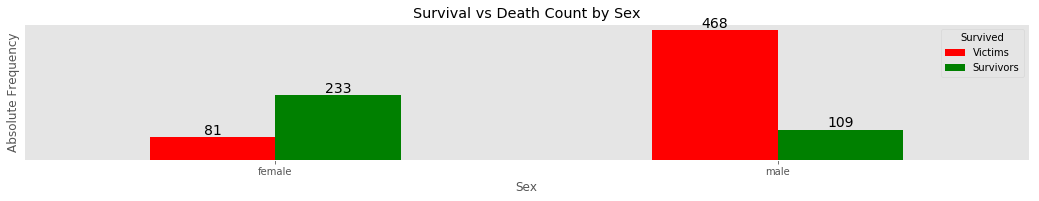

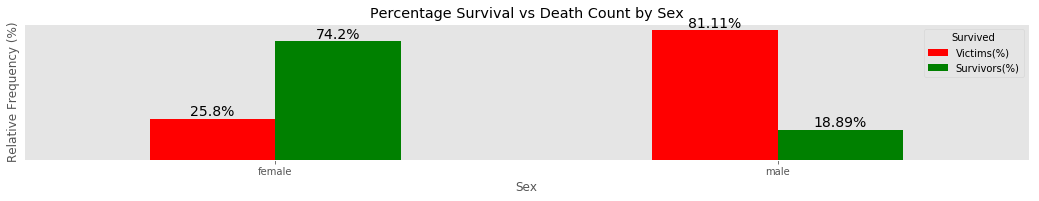

In [53]:
'''Count and plot the no of passergers who survived and died due to their sex in absolute and relative scale.'''
crosstab(df_train.Sex, df_train.Survived)

**Findings:** Out of 342 survivors, 233 passergers were female while only 109 passengers were male. So female survivors were more than double the male survivors. Proportion tells a female has over 74% chance of survival while male has almost 19% chance of survival. So female has the best chance of survival.

***Chi-square Test***: The Chi-square test of independence tests if there is a significant relationship between two categorical variables.The data is usually displayed in a cross-tabulation format with each row representing a category for one variable and each column representing a category for another variable. Chi-square test of independence is an omnibus test.That is it tests the data as a whole. This means that one will not be able to tell which levels (categories) of the variables are responsible for the relationship **if the Chi-square table is larger than 2×2. If the test is larger than 2×2, it requires post hoc testing.**

--The H0 (Null Hypothesis): There is no relationship between variable one and variable two.

--The H1 (Alternative Hypothesis): There is a relationship between variable 1 and variable 2.

If the p-value is significant (less than 0.05), you can reject the null hypothesis and claim that the findings support the alternate hypothesis. While we check the results of the chi2 test, we need also to check that the expected cell frequencies are greater than or equal to 5. If a cell has an expected frequency less that 5, then the Fisher’s Exact test should be use to overcome this problem.

The chi2_contingency() method conducts the Chi-square test on a contingency table (crosstab).

In [54]:
'''Perform chi-square test of independence between Survived and Sex.'''
chi_square(df_train.Sex, df_train.Survived)

Chi_square test result between Survived & Sex


(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

***Interpretation of chi-square test outcome***: The first value (260.717) is the Chi-square value, followed by the p-value (1.197e-58), then comes the degrees of freedom (1), and lastly it outputs the expected frequencies as an array. Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05(infact p value is almost 0).  Thus, the results indicate that there is a statistically significant relationship between Sex and Survived.

### 8.2.2 Pclass & Survived <a id="8.2.2"></a>

Survivals and Deaths by Pclass : 
 Survived  Victims  Survivors
Pclass                      
1              80        136
2              97         87
3             372        119

Percentage Survivals and Deaths by Pclass : 
 Survived  Victims(%)  Survivors(%)
Pclass                            
1              37.04         62.96
2              52.72         47.28
3              75.76         24.24


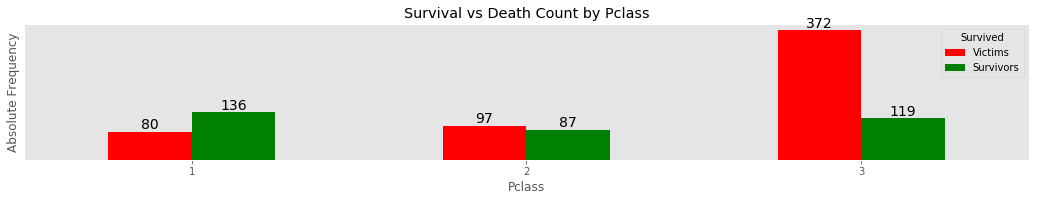

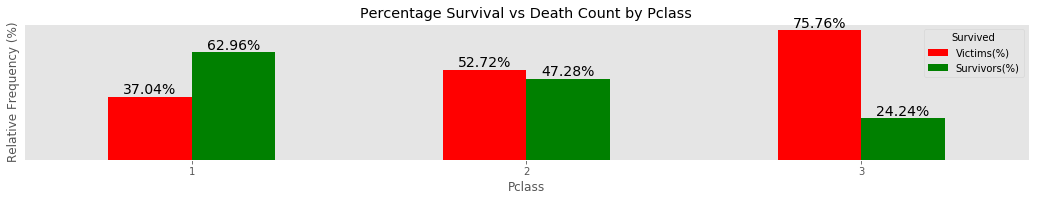

In [55]:
'''Count and plot the number of passengers who survived and died due to their pclass in absolute and relative scale.'''
crosstab(df_train.Pclass, df_train.Survived)

**Findings:** Out of 342 survivors, pclass1(136) has the most number of survivors followed by pclass3(119) and pclass2(87). But the percentage tells different story. If you're in class1, your survival chance is nearly 63% while pclass2 has just over 47% survival chance. But if you are in class3, your chance of survival is very bleak, i.e.,just over 24%.

In [56]:
'''Perform chi-square test of independence between Survived and Pclass.'''
chi_square(df_train.Pclass, df_train.Survived)

Chi_square test result between Survived & Pclass


(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

**Interpretation of chi-square test outcome:** The overall 3x2 table has a chi-square value of 102.889, pvalue  of 4.549e-23, degrees of freedom of 2 and the rest are the expected frequencies of array. Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05(infact p value is almost 0). Thus, the results indicate that there is a statistically significant relationship between Pclass and titanic's survivors. 


**Post Hoc Test**: Although our Chi-square test was signficant, since our analysis is 3x2 we don't know which levels of Pclass(1, 2 or 3) have the strongest association with variable Survived. Hence we need to perform a post hoc test to verify if and which combinations are actually significantly associated with Survived. In order to do this, we need to conduct multiple 2×2 Chi-square tests using the *Bonferroni-adjusted p-value.*

To conduct multiple 2×2 Chi-square tests, one needs to regroup the variables for each test to where it is one category against the rest. For us, it will be:

*1 vs 2

*1 vs 3

*2 vs 3


**Because there are three comparisons, the Bonferroni-adjusted P value needed for significance is 0.05/3, or 0.017. So for our any planned pairwise comparisons to be significant, the p-value must be less than 0.017.**

In [57]:
'''Calculate Bonferroni-adjusted pvalue for Pclass (1,2,3) and Survived.'''
bonferroni_adjusted(df_train.Pclass, df_train.Survived)

(71.46583854616047, 2.821002116713357e-17, 1, array([[415.90909091, 259.09090909],
       [133.09090909,  82.90909091]]))
(7.2971925540056475, 0.006906243870048795, 1, array([[435.62626263, 271.37373737],
       [113.37373737,  70.62626263]]))
(91.23179223158795, 1.277904920294387e-21, 1, array([[246.46464646, 153.53535354],
       [302.53535354, 188.46464646]]))

Columns: Int64Index([1, 2, 3], dtype='int64')


**Interpretation of the outcome of  Bonferroni-adjusted p-value test:** Using the Bonferroni-adjusted p-value of 0.017, 3 out of 3 planned pairwise comparisons are significant. Though p value suggests Pclass2 has the weakest association with Survived compared to Pclass1 and Pclass3.

###  8.2.3 Embarked & Survived <a id="8.2.3"></a>

Survivals and Deaths by Embarked : 
 Survived  Victims  Survivors
Embarked                    
C              75         93
Q              47         30
S             427        219

Percentage Survivals and Deaths by Embarked : 
 Survived  Victims(%)  Survivors(%)
Embarked                          
C              44.64         55.36
Q              61.04         38.96
S              66.10         33.90


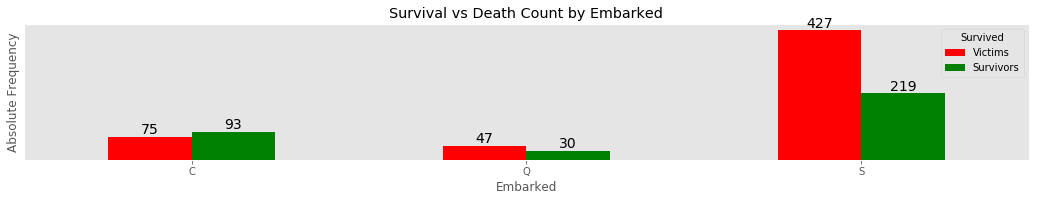

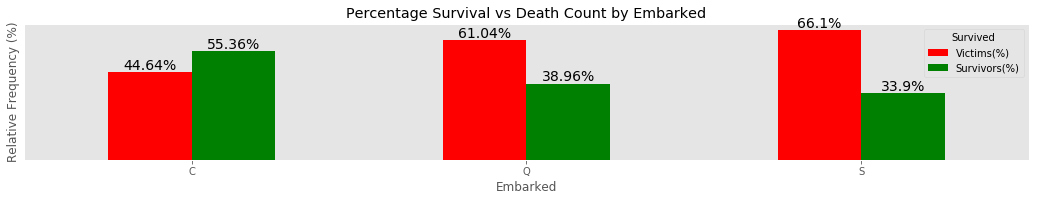

In [58]:
'''Count and plot the survivors and victims by place of embarkation in absolute and relative scale.'''
crosstab(df_train.Embarked, df_train.Survived)

**Findings:** Though people embarked from Southampton have the most survivors count (219) but proportion-wise it has only nearly 34% chance of survival. Because 427 passengers embarked from Southampton died. On the contrary, if you would embark from Cherbourg, you have a very decent chance of survival of over 55%.  Finally, people embarked from  Queenstown have a chance of survival more than 5% from those who embarked from Southampton.

In [59]:
'''Now perform chi-square test to find the association between Embarked and Survived.'''
chi_square(df_train.Embarked, df_train.Survived)

Chi_square test result between Survived & Embarked


(25.964452881874784,
 2.3008626481449577e-06,
 2,
 array([[103.51515152,  64.48484848],
        [ 47.44444444,  29.55555556],
        [398.04040404, 247.95959596]]))

**Interpretation of chi-square test result:** The  3x2 table has a chi-square value of 25.96, pvalue of 2.3e-06, degrees of freedom of 2 and the rest are the expected frequencies of array. Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05(infact p value is less than 0.01). Thus, the results indicate that there is a statistically significant relationship between the variables Embarked and Survived.

**Because there are three comparisons, the Bonferroni-adjusted P value needed for significance is 0.05/3, or 0.017. So for our any planned pairwise comparisons to be significant, the p-value must be less than 0.017.**

In [60]:
'''Calculate Bonferroni-adjusted pvalue  between Embarked (C,Q,S one by one) and Survived.'''
bonferroni_adjusted(df_train.Embarked, df_train.Survived)

(24.34294028991685, 8.062166851376562e-07, 1, array([[445.48484848, 277.51515152],
       [103.51515152,  64.48484848]]))
(0.00018551307377882246, 0.9891328942213099, 1, array([[501.55555556, 312.44444444],
       [ 47.44444444,  29.55555556]]))
(19.279400244953347, 1.1291808110540787e-05, 1, array([[150.95959596,  94.04040404],
       [398.04040404, 247.95959596]]))

Columns: Index(['C', 'Q', 'S'], dtype='object')


**Interpreting the result of pair-wise Bonferroni-adjusted pvalue:** Using the Bonferroni-adjusted p-value of 0.017, 2 of the 3 planned pairwise comparisons are significant. Bonferroni-adjusted p-value for Q and Survived is 0.989 which is way greater than 0.017. So it can be said that level Q of variable Embarked is not statistically associated with variable Survived.

### 8.2.4 SibSp & Survived <a id="8.2.4"></a>

Survivals and Deaths by SibSp : 
 Survived  Victims  Survivors
SibSp                       
0             398        210
1              97        112
2              15         13
3              12          4
4              15          3
5               5          0
8               7          0

Percentage Survivals and Deaths by SibSp : 
 Survived  Victims(%)  Survivors(%)
SibSp                             
0              65.46         34.54
1              46.41         53.59
2              53.57         46.43
3              75.00         25.00
4              83.33         16.67
5             100.00          0.00
8             100.00          0.00


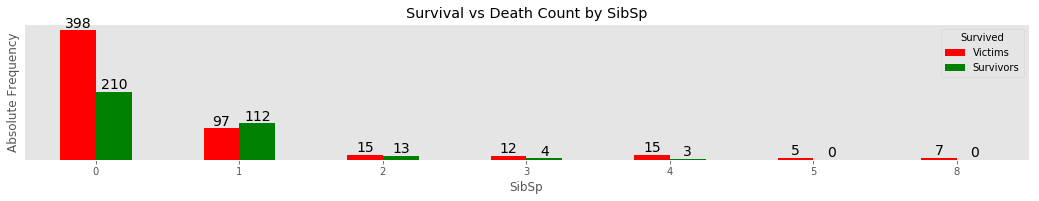

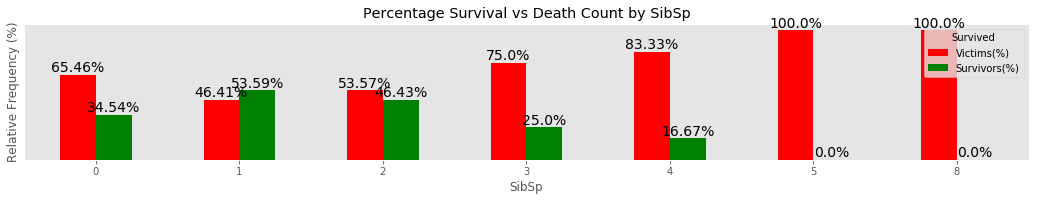

In [61]:
'''Count and plot absolute and relative number of survivors and victims due to SibSp.'''
crosstab(df_train.SibSp, df_train.Survived)

**Findings:** A large number of passengers (210) who survived were without (0) any siblings or spouse, followed by 112 passengers with 1 spouse or siblings. Percentage-wise, passengers with 1 spouse or siblings had over 53.5% chance of survival, followed by passengers with 2 siblings or spouse had over 46% chance of survival. Passengers with 5 or 8 siblings or spouse had all died.

In [62]:
'''Chi-square test between SibSp and Survived.'''
chi_square(df_train.SibSp, df_train.Survived)

Chi_square test result between Survived & SibSp


(37.2717929152043,
 1.5585810465902147e-06,
 6,
 array([[374.62626263, 233.37373737],
        [128.77777778,  80.22222222],
        [ 17.25252525,  10.74747475],
        [  9.85858586,   6.14141414],
        [ 11.09090909,   6.90909091],
        [  3.08080808,   1.91919192],
        [  4.31313131,   2.68686869]]))

**Interpretation of Chi-square Test:**  Since all the expected frequencies aren't greater than 5, chi-square test result can't be trusted.

### 8.2.5 Parch & Survived  <a id="8.2.5"></a>

Survivals and Deaths by Parch : 
 Survived  Victims  Survivors
Parch                       
0             445        233
1              53         65
2              40         40
3               2          3
4               4          0
5               4          1
6               1          0

Percentage Survivals and Deaths by Parch : 
 Survived  Victims(%)  Survivors(%)
Parch                             
0              65.63         34.37
1              44.92         55.08
2              50.00         50.00
3              40.00         60.00
4             100.00          0.00
5              80.00         20.00
6             100.00          0.00


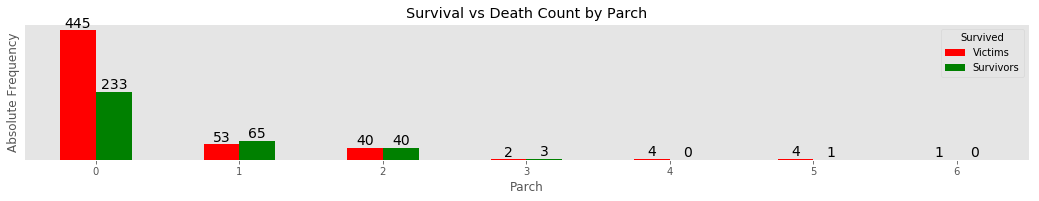

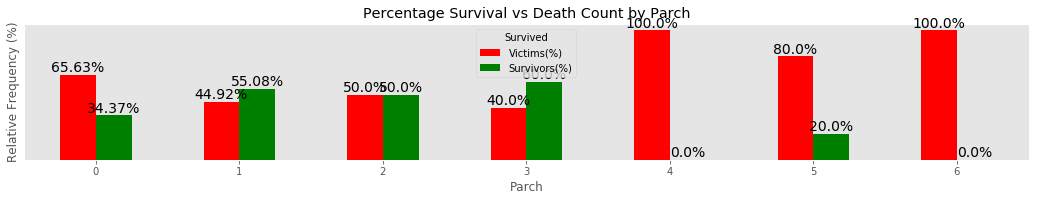

In [63]:
'''Count and visualize absolute and relative number of survivors and victims by Parch.'''
crosstab(df_train.Parch, df_train.Survived)

**Findings:** Passengers with 3 children/parent had 60% survival rate, followed by passengers with 2 children/parent has a 50% survival rate. No passengers survived with 4 or 6 children/parent.

In [64]:
'''Perform Chi-square test of independence between Parch and Survived.'''
chi_square(df_train.Parch, df_train.Survived)

Chi_square test result between Survived & Parch


(27.925784060236168,
 9.703526421039997e-05,
 6,
 array([[4.17757576e+02, 2.60242424e+02],
        [7.27070707e+01, 4.52929293e+01],
        [4.92929293e+01, 3.07070707e+01],
        [3.08080808e+00, 1.91919192e+00],
        [2.46464646e+00, 1.53535354e+00],
        [3.08080808e+00, 1.91919192e+00],
        [6.16161616e-01, 3.83838384e-01]]))

**Interpretation of Chi-square Test Outcome:**  Since all the expected frequencies aren't greater than 5, chi-square test result can't be trusted.

### 8.2.6 Title & Survived <a id="8.2.6"></a>

Survivals and Deaths by Title : 
 Survived    Victims  Survivors
Title                         
Aristocrat        2          3
Master           17         23
Miss             55        130
Mr              436         81
Mrs              26        100
Officer          13          5

Percentage Survivals and Deaths by Title : 
 Survived    Victims(%)  Survivors(%)
Title                               
Aristocrat       40.00         60.00
Master           42.50         57.50
Miss             29.73         70.27
Mr               84.33         15.67
Mrs              20.63         79.37
Officer          72.22         27.78


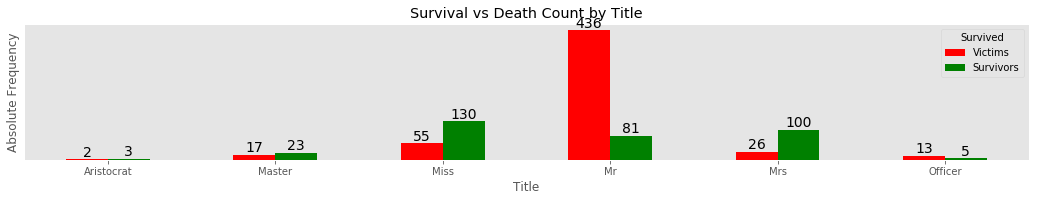

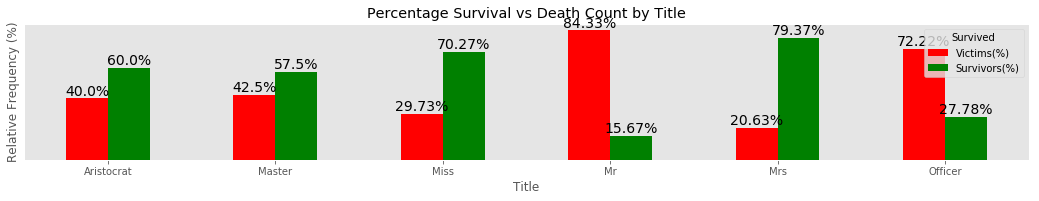

In [65]:
'''Count and visualize absolute and relative number of survivors and victims by Title.'''
crosstab(df_train.Title, df_train.Survived)

**Findings:** Women had the best survival rate, i.e., Mrs(over 79%) and Miss(over 70%) that reminds us the variable Sex where we have seen female were more likely to survive in. Mr is the worst title to have when it comes to survival situation since just over 15% of passengers with title Mr survived that again indicates the importance of Sex as a deal breaker for survival.

In [66]:
'''Perform Chi-square test of independence between Title and Survived.'''
chi_square(df_train.Title, df_train.Survived)

Chi_square test result between Survived & Title


(289.8360961873925,
 1.5325912223703196e-60,
 5,
 array([[  3.08080808,   1.91919192],
        [ 24.64646465,  15.35353535],
        [113.98989899,  71.01010101],
        [318.55555556, 198.44444444],
        [ 77.63636364,  48.36363636],
        [ 11.09090909,   6.90909091]]))

**Interpretation of chi-square test result**: Since all the expected frequencies aren't greater than 5, chi-square test result can't be trusted.

### 8.2.7 Family_size & Survived <a id="8.2.7"></a>

Survivals and Deaths by Family_size : 
 Survived     Victims  Survivors
Family_size                    
large             40          7
medium            20         24
single           374        163
small            115        148

Percentage Survivals and Deaths by Family_size : 
 Survived     Victims(%)  Survivors(%)
Family_size                          
large             85.11         14.89
medium            45.45         54.55
single            69.65         30.35
small             43.73         56.27


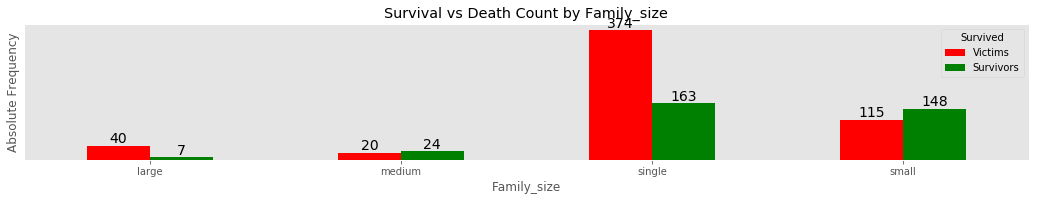

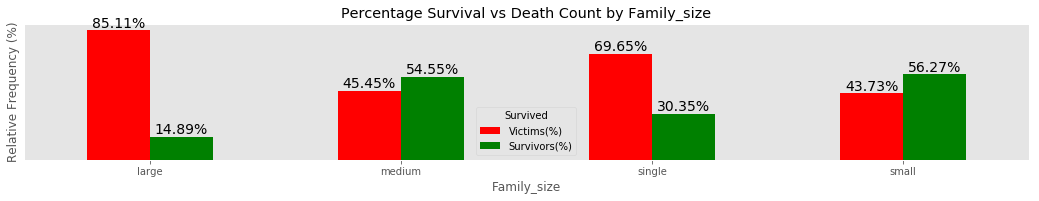

In [67]:
'''Survivors and victims count and percentage count by Family_size. Also plot the absolute and percentage count.'''
crosstab(df_train.Family_size, df_train.Survived)

**Findings:** Passengers with small and medium familiy size had good survival rate. Single passengers had survival chance of just over 30%. And passengers with large families has a survival rate below 15%.

In [68]:
'''Perform Chi-square test of independence between Family_size and Survived.'''
chi_square(df_train.Family_size, df_train.Survived)

Chi_square test result between Survived & Family_size


(66.05581680279249,
 2.981870009647575e-14,
 3,
 array([[ 28.95959596,  18.04040404],
        [ 27.11111111,  16.88888889],
        [330.87878788, 206.12121212],
        [162.05050505, 100.94949495]]))

**Interpretation of chi-square test result**:Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05(infact p value is almost 0). Thus, the results indicate that there is a statistically significant relationship between variable Family_size and Survived.

**Because there are 8 comparisons, the Bonferroni-adjusted P value needed for significance is 0.05/8, or 0.0063. So for our any planned pairwise comparisons to be significant, the p-value must be less than 0.0063.**

In [69]:
'''Calculate Bonferroni-adjusted pvalue  between Family_size and Survived.'''
bonferroni_adjusted(df_train.Family_size, df_train.Survived)

(10.55137053799774, 0.0011610196650239893, 1, array([[520.04040404, 323.95959596],
       [ 28.95959596,  18.04040404]]))
(4.418221527178599, 0.03555707818485421, 1, array([[521.88888889, 325.11111111],
       [ 27.11111111,  16.88888889]]))
(36.00051446773865, 1.9726543846517113e-09, 1, array([[218.12121212, 135.87878788],
       [330.87878788, 206.12121212]]))
(49.42743388214718, 2.058468013374345e-12, 1, array([[386.94949495, 241.05050505],
       [162.05050505, 100.94949495]]))

Columns: Index(['large', 'medium', 'single', 'small'], dtype='object')


**Interpretation of Bonferroni-adjusted Post-hoc test result:** Using the Bonferroni-adjusted p-value of 0.0063, 3 of the 4 planned pairwise comparisons are significant. Bonferroni-adjusted p-value for medium and Survived is 0.03555 which is way greater than 0.0063. So it can be said that level medium of variable Family_size is not statistically associated with variable Survived.

### 8.2.8 Cabin & Survived <a id="8.2.8"></a>

Survivals and Deaths by Cabin : 
 Survived  Victims  Survivors
Cabin                       
A               8          7
B              12         35
C              24         35
D               8         25
E               8         24
F               5          8
G               2          2
T               1          0
X             481        206

Percentage Survivals and Deaths by Cabin : 
 Survived  Victims(%)  Survivors(%)
Cabin                             
A              53.33         46.67
B              25.53         74.47
C              40.68         59.32
D              24.24         75.76
E              25.00         75.00
F              38.46         61.54
G              50.00         50.00
T             100.00          0.00
X              70.01         29.99


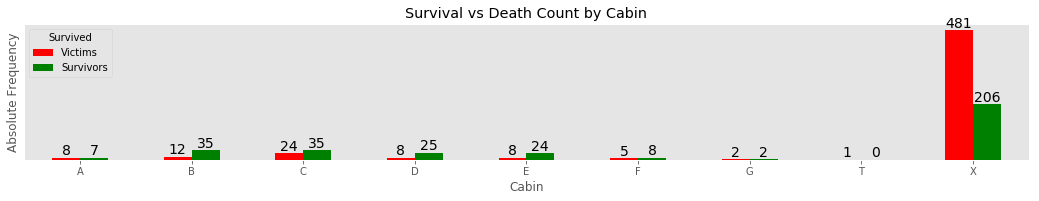

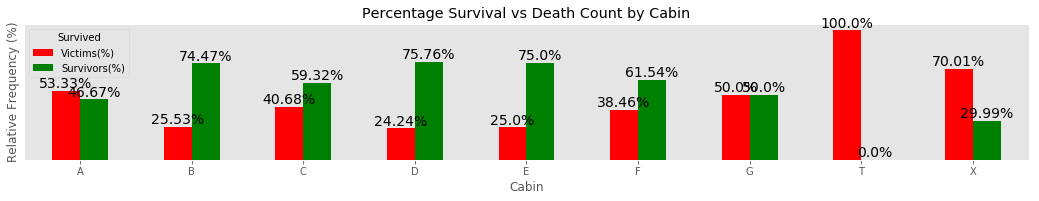

In [70]:
'''Count and plot absolute and relative number of survivors and victims due to Cabin possession.'''
crosstab(df_train.Cabin, df_train.Survived)

**Findings:** Most of the passengers survived and died were from cabin X. But percentage-wise, its category B, D, and E that had impressive chance of survival. People from cabin category X had just 30% chance of survival.

In [71]:
"""Perform Chi-square test of independence between Cabin and Survived."""
chi_square(df_train.Cabin, df_train.Survived)

Chi_square test result between Survived & Cabin


(99.16416061888009,
 6.326020042314704e-18,
 8,
 array([[9.24242424e+00, 5.75757576e+00],
        [2.89595960e+01, 1.80404040e+01],
        [3.63535354e+01, 2.26464646e+01],
        [2.03333333e+01, 1.26666667e+01],
        [1.97171717e+01, 1.22828283e+01],
        [8.01010101e+00, 4.98989899e+00],
        [2.46464646e+00, 1.53535354e+00],
        [6.16161616e-01, 3.83838384e-01],
        [4.23303030e+02, 2.63696970e+02]]))

**Interpretation of chi-square test result**:Since all of the expected frequencies aren't greater than 5, the chi2 test results can't be trusted.

### 8.2.9 Ticket & Survived <a id="8.2.9"></a>

Survivals and Deaths by Ticket : 
 Survived  Victims  Survivors
Ticket                      
A              27          2
C              31         16
F               3          4
L               3          1
N             407        254
P              23         42
S              44         21
W              11          2

Percentage Survivals and Deaths by Ticket : 
 Survived  Victims(%)  Survivors(%)
Ticket                            
A              93.10          6.90
C              65.96         34.04
F              42.86         57.14
L              75.00         25.00
N              61.57         38.43
P              35.38         64.62
S              67.69         32.31
W              84.62         15.38


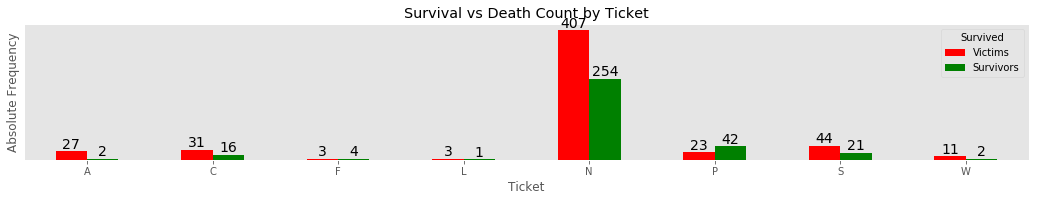

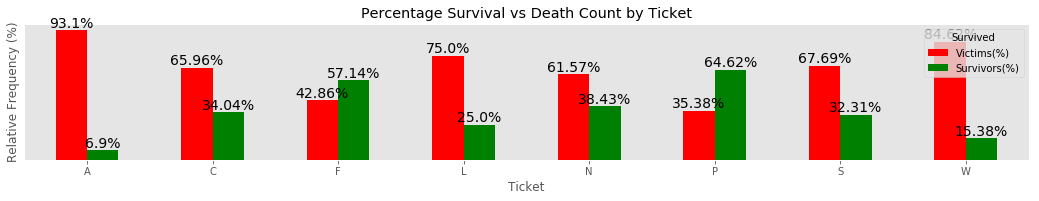

In [72]:
'''Count and plot absolute and relative number of survivors and victims due to Ticket category.'''
crosstab(df_train.Ticket, df_train.Survived)

**Findings:** 93% passengers died with Ticket category A, over 64% survived from category P. Over 57% survived from F and just over 15% passengers survived from ticket category W.

In [73]:
'''Perform Chi-square test of independence between Ticket and Survived.'''
chi_square(df_train.Ticket, df_train.Survived)

Chi_square test result between Survived & Ticket


(36.7098892616397,
 5.323006335674428e-06,
 7,
 array([[ 17.86868687,  11.13131313],
        [ 28.95959596,  18.04040404],
        [  4.31313131,   2.68686869],
        [  2.46464646,   1.53535354],
        [407.28282828, 253.71717172],
        [ 40.05050505,  24.94949495],
        [ 40.05050505,  24.94949495],
        [  8.01010101,   4.98989899]]))

**Interpretation of chi-square test result**: Since all of the expected frequencies aren't greater than 5, the chi2 test results can't be trusted.

# 9.Multivariate Analysis <a id="9"></a>

In multivariate analysis, we try to find the relationship among more than two variables. Number of predictor variable in bivariate analysis was one. On the contrary, number of predictor variables for multivariate analysis are more than one. More specifically, we will try to associate more than one predictor variable with the response variable. We will just visualize the impact of different predictor variables (3 variables) at a time on variable Survived.

In [74]:
'''Create a function that plots the impact of 3 predictor variables at a time on a target variable.'''
def multivariate_analysis(cat1, cat2, cat3, cat_target):
    grouped = round(pd.crosstab(index = [cat1, cat2, cat3], columns = cat_target, normalize = 'index')*100, 2)
    grouped.rename({0:'Died%', 1:'Survived%'}, axis = 1, inplace = True)
    ax = grouped.plot.bar(color = ['r', 'g'])
    plt.ylabel('Relative Frequency (%)')

## 9.1 (Pclass, Sex, Cabin) vs Survived <a id="9.1"></a>

**Sex male seems to be deciding factor for death.**

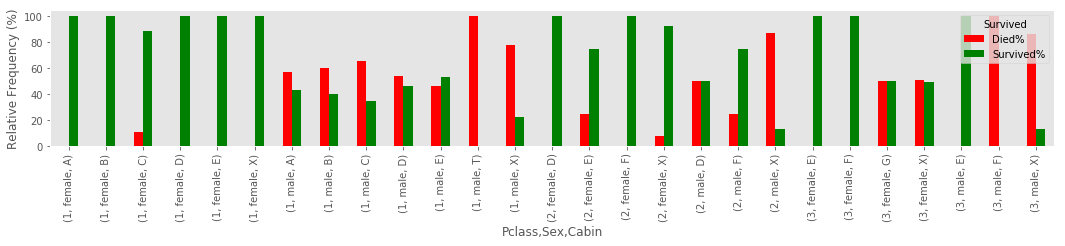

In [75]:
'''Proportion of survivors and victims due to pclass, sex, and cabin.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Cabin, df_train.Survived)
bold('**Sex male seems to be deciding factor for death.**')

## 9.2 (Pclass, Sex, Embarked) vs Survived <a id="9.2"></a>

**Again Sex male seems to be deciding factor for death and female for survival.**

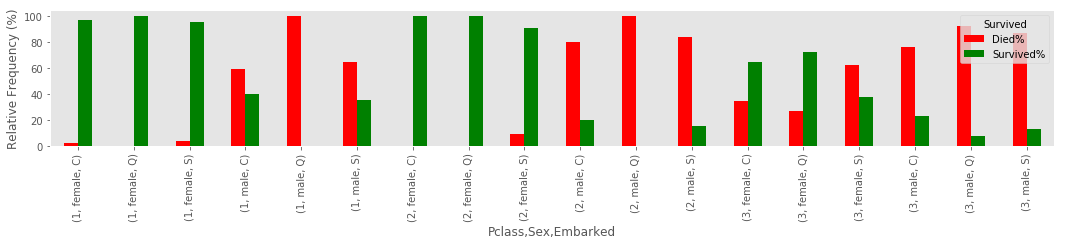

In [76]:
'''Proportion of survivors and victims due to pclass, sex, and embarked.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Embarked, df_train.Survived)
bold('**Again Sex male seems to be deciding factor for death and female for survival.**')

## 9.3 (Pclass, Sex, SibSp) vs Survived <a id="9.3"></a>

**Bigger SibSp and male is responsible more for death.**

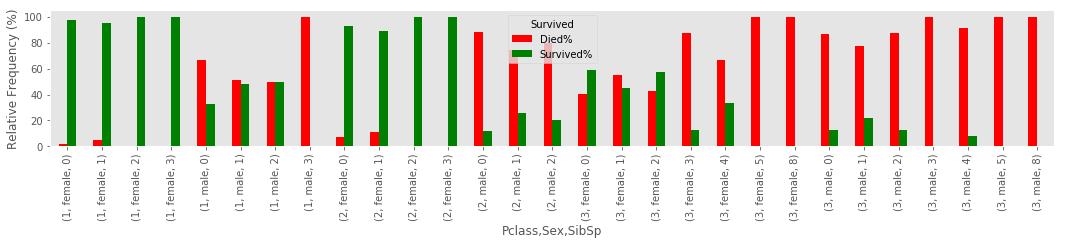

In [77]:
'''Proportion of survivors and victims due to pclass, sex, and SibSp.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.SibSp, df_train.Survived)
bold('**Bigger SibSp and male is responsible more for death.**')

## 9.4 (Pclass, Sex, Parch) vs Survived <a id="9.4"></a>

**Bigger Parch and Sex male is responsible more for death.**

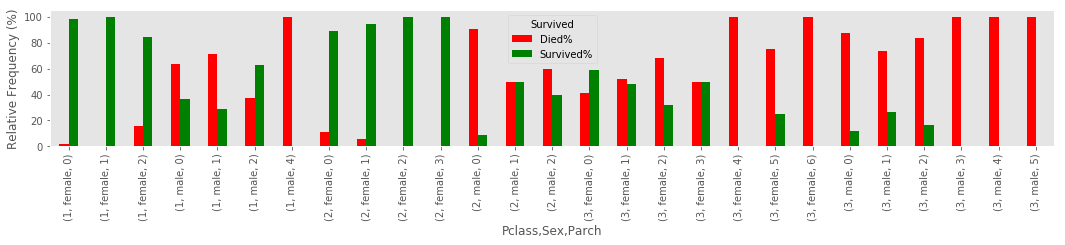

In [78]:
'''Proportion of survivors and victims due to pclass, sex, and Parch.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Parch, df_train.Survived)
bold('**Bigger Parch and Sex male is responsible more for death.**')

## 9.5 (Pclass, Sex, Title) vs Survived <a id="9.5"></a>

** Passengers with sex male and title mr mostly died.**

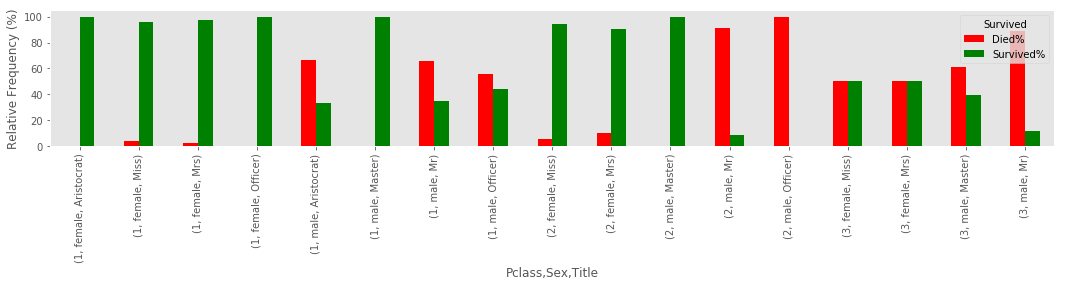

In [79]:
'''Proportion of survivors and victims due to pclass, sex, and title.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Title, df_train.Survived)
bold('** Passengers with sex male and title mr mostly died.**')

## 9.6 (Pclass, Sex, Family_size) vs Survived <a id="9.6"></a>

** Sex male, family_size single and large greatly influence the death ratio.**

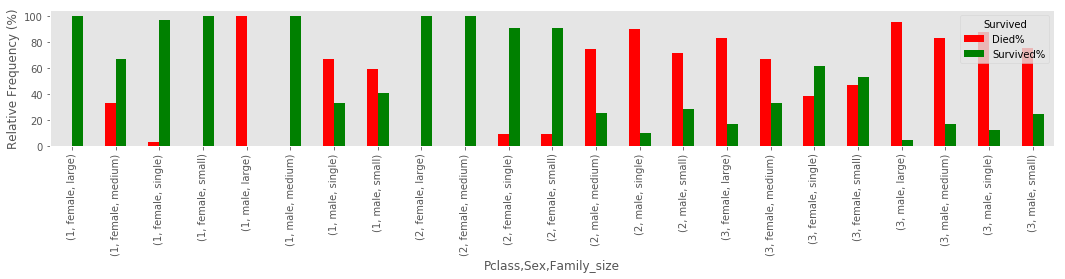

In [80]:
'''Proportion of survivors and victims due to pclass, sex, and family_size.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Family_size, df_train.Survived)
bold('** Sex male, family_size single and large greatly influence the death ratio.**')

## 9.7 (Pclass, Sex, Ticket) vs Survived <a id="9.7"></a>

**Sex female, ticket p and w mostly survived.**

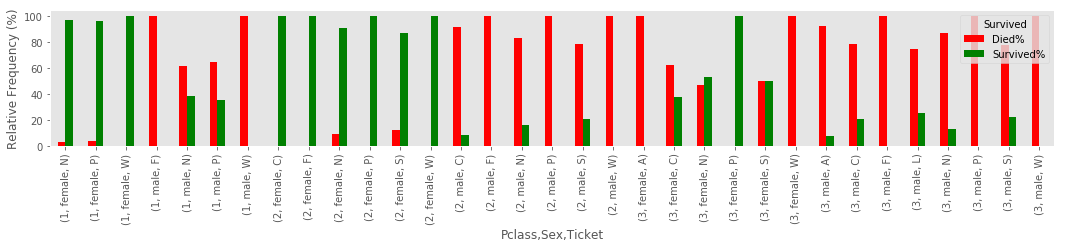

In [81]:
'''Proportion of survivors and victims due to pclass, sex, and Ticket category.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Ticket, df_train.Survived)
bold('**Sex female, ticket p and w mostly survived.**')

## 9.8 (Pclass, Title, Cabin) vs Survived <a id="9.8"></a>

**Title mrs, master and cabin x had best survival ratio.**

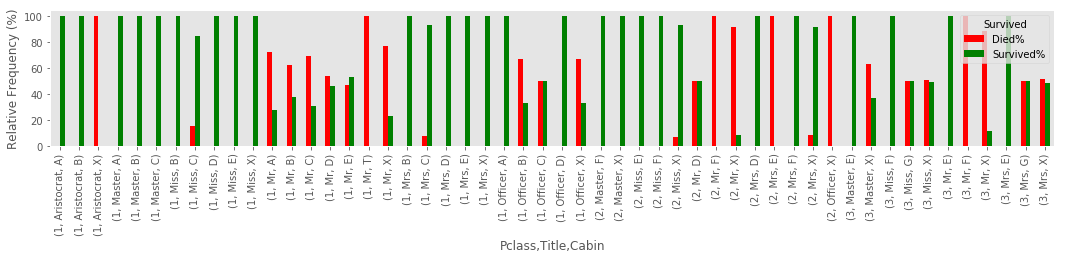

In [82]:
'''Proportion of survivors and victims due to pclass, title, and cabin.'''
multivariate_analysis(df_train.Pclass, df_train.Title, df_train.Cabin, df_train.Survived)
bold('**Title mrs, master and cabin x had best survival ratio.**')

## 9.9 (Family_size, Sex, Cabin) vs Survived <a id="9.9"></a>

**Family_size small, medium and sex female had best survival chance.**

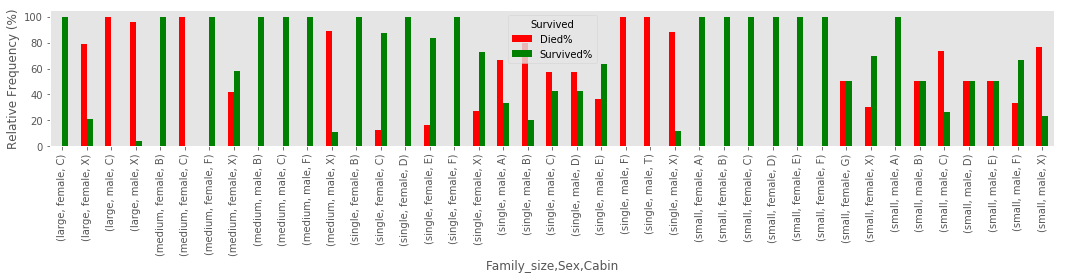

In [83]:
'''Proportion of survivors and victims due to family_size, sex, and cabin.'''
multivariate_analysis(df_train.Family_size, df_train.Sex, df_train.Cabin, df_train.Survived)
bold('**Family_size small, medium and sex female had best survival chance.**')

## 9.10 (Sex, Title, Family_size) vs Survived <a id="9.10"></a>

**Title aristocrat, sex female and family_size small mostly survived.**

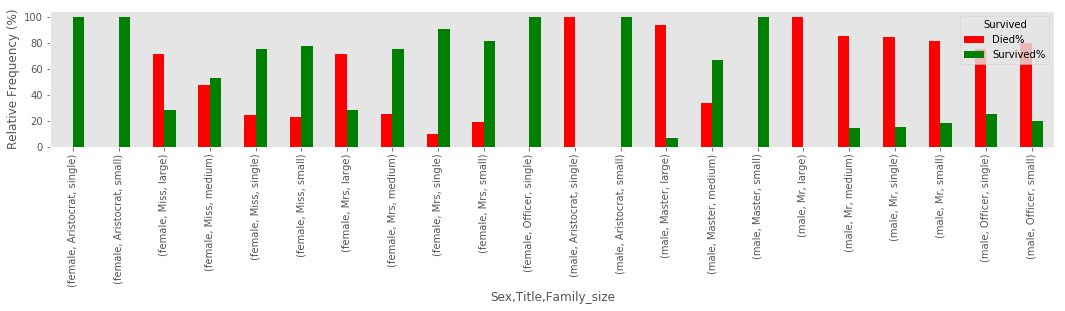

In [84]:
'''Proportion of survivors and victims due to sex, title, and family_size.'''
multivariate_analysis(df_train.Sex, df_train.Title, df_train.Family_size, df_train.Survived)
bold('**Title aristocrat, sex female and family_size small mostly survived.**')

## 9.11 (Sex, Title, Cabin) vs Survived <a id="9.11"></a>

**Title aristocrat, miss, mrs and sex female mostly survived.**

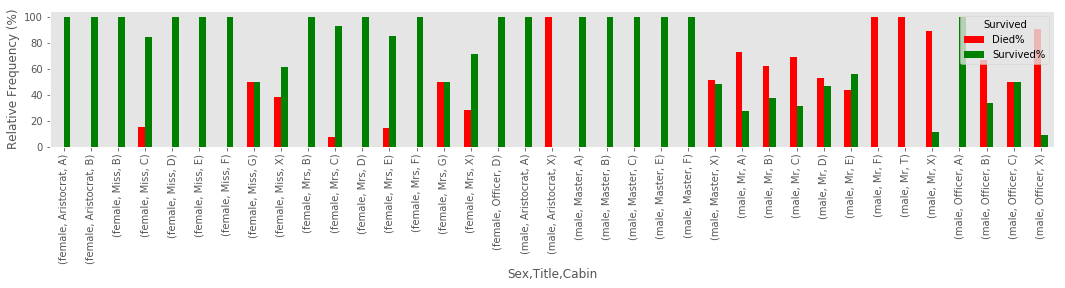

In [85]:
'''Proportion of survivors and victims due to sex, title, and cabin.'''
multivariate_analysis(df_train.Sex, df_train.Title, df_train.Cabin, df_train.Survived)
bold('**Title aristocrat, miss, mrs and sex female mostly survived.**')

## 9.12 (Sex, Title, Embarked) vs Survived <a id="9.12"></a>

**Embarked c, sex female and title master and aristocrat had best survival rate.**

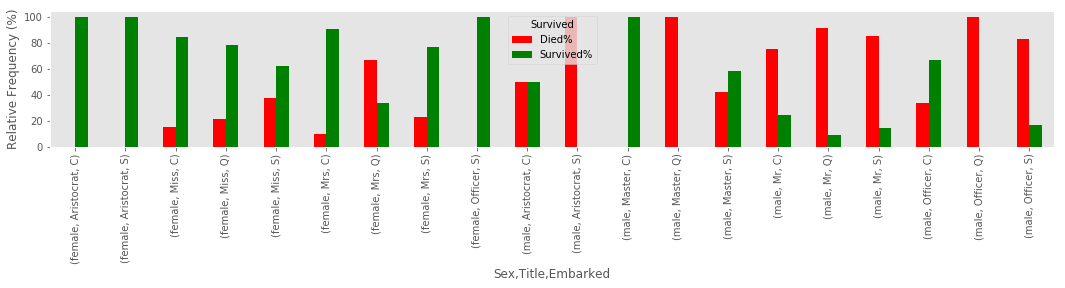

In [86]:
'''Proportion of survivors and victims due to sex, title, and embarked.'''
multivariate_analysis(df_train.Sex, df_train.Title, df_train.Embarked, df_train.Survived)
bold('**Embarked c, sex female and title master and aristocrat had best survival rate.**')

## 9.13 (Sex, Title, Ticket) vs Survived <a id="9.13"></a>

**Ticker n, w and sex male and title mr mostly died.**

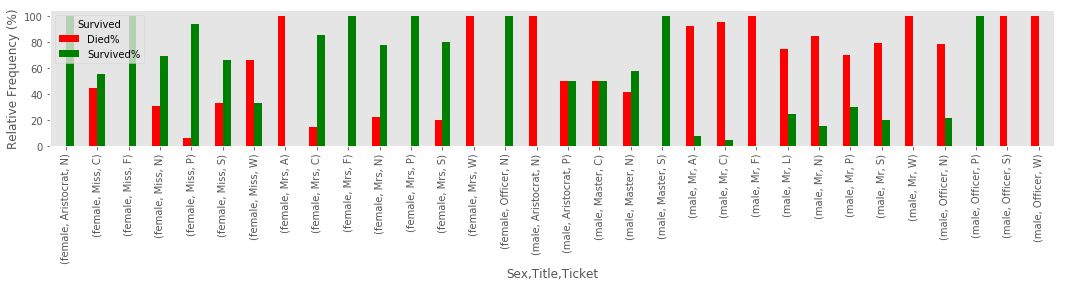

In [87]:
"""Proportion of survivors and victims due to sex, title, and Ticket."""
multivariate_analysis(df_train.Sex, df_train.Title, df_train.Ticket, df_train.Survived)
bold('**Ticker n, w and sex male and title mr mostly died.**')

# 10.Data Transformation <a id="10"></a>
In this section, we will categorize our continuous variables. After that, redundant and useless features will be deleted.
And finally categorical variables will be encoded into numerical to feed our machine learning models.

## 10.1 Binning Continuous Variables <a id="10.1"></a>
We saw Age is inversely correlated with survival and infants were more likely to survive. We will create some categories of age to check which categories of age  are more likely to survive. We would do the same for Fare except Fair is posivively correlated with Survived.

**Note:** Binning continuous variables prevents overfitting which is a common problem for tree based models like decision trees and random forest.

### 10.1.1 Binning Age <a id="10.1.1"></a>

In [88]:
'''Create bin categories for Age.'''
label_names = ['infant','child','teenager','young_adult','adult','aged']

'''Create range for each bin categories of Age.'''
cut_points = [0,5,12,18,35,60,81]

'''Create and view categorized Age with original Age.'''
merged['Age_binned'] = pd.cut(merged.Age, cut_points, labels = label_names)
display(merged[['Age', 'Age_binned']].head(2))

,Age,Age_binned
0,22.0,young_adult
1,38.0,adult


### 10.1.2 Binning Fare <a id="10.1.2"></a>

In [89]:
'''Create bin categories for Fare.'''
groups = ['low','medium','high','very_high']

'''Create range for each bin categories of Fare.'''
cut_points = [-1, 130, 260, 390, 520]

'''Create and view categorized Fare with original Fare.'''
merged['Fare_binned'] = pd.cut(merged.Fare, cut_points, labels = groups)
display(merged[['Fare', 'Fare_binned']].head(2))

,Fare,Fare_binned
0,7.2500,low
1,71.2833,low


##  10.2 Dropping Features <a id="10.2"></a>
Now we have both transformed and the original variables transformation have been made from. So we should safely drop the variables that we think would not be useful anymore for our survival analysis since they are very unlikely to be analyzed in their raw forms.

In [90]:
"""Let's see all the variables we currently have with their category."""
display(merged.head(2))

'''Drop the features that would not be useful anymore.'''
merged.drop(columns = ['Name', 'Age', 'Fare'], inplace = True, axis = 1)

'''Features after dropping.'''
bold('**Features remaining after dropping:**')
display(merged.columns)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Age_binned,Fare_binned
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A,7.2500,X,S,Mr,small,young_adult,low
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,P,71.2833,C,C,Mrs,small,adult,low


**Features remaining after dropping:**

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Cabin', 'Embarked', 'Title', 'Family_size', 'Age_binned',
       'Fare_binned'],
      dtype='object')

## 10.3 Correcting Data Types <a id="10.3"></a>

In [91]:
'''Checking current data types.'''
bold('**Current variable Data Types:**')
display(merged.dtypes)

**Current variable Data Types:**

PassengerId       int64
Survived        float64
Pclass            int64
Sex              object
SibSp             int64
Parch             int64
Ticket           object
Cabin            object
Embarked         object
Title            object
Family_size      object
Age_binned     category
Fare_binned    category
dtype: object

1. PassengerId, SibSp, and Parch data types will be kept same (integer).
2. Survived data type will be converted into integer and rest of the variables' data types will be converted into categorical data types.

In [92]:
'''Correcting data types, converting into categorical variables.'''
merged.loc[:, ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title', 'Family_size', 'Ticket']] = merged.loc[:, ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title', 'Family_size', 'Ticket']].astype('category')

'''Due to merging there are NaN values in Survived for test set observations.'''
merged.Survived = merged.Survived.dropna().astype('int')#Converting without dropping NaN throws an error.

'''Check if data types have been corrected.'''
bold('**Data types after correction:**')
display(merged.dtypes)

**Data types after correction:**

PassengerId       int64
Survived          int32
Pclass         category
Sex            category
SibSp             int64
Parch             int64
Ticket         category
Cabin          category
Embarked       category
Title          category
Family_size    category
Age_binned     category
Fare_binned    category
dtype: object

## 10.4 Encoding Categorical Variables <a id="10.4"></a>

In [93]:
'''Convert categorical data into numeric to feed our machine learning model.'''
merged = pd.get_dummies(merged)

"""Let's visualize the updated dataset."""
display(merged.head(2))

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Ticket_A,...,Age_binned_infant,Age_binned_child,Age_binned_teenager,Age_binned_young_adult,Age_binned_adult,Age_binned_aged,Fare_binned_low,Fare_binned_medium,Fare_binned_high,Fare_binned_very_high
0,1,0,1,0,0,0,1,0,1,1,...,0,0,0,1,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


# 11.Model Building and Evaluation <a id="11"></a>

In [94]:
"""Let's split the train and test set to feed machine learning algorithm."""
df_train = merged.iloc[:891, :]
df_test  = merged.iloc[891:, :]

'''Drop passengerid from train set and Survived from test set.'''
df_train = df_train.drop(columns = ['PassengerId'], axis = 1)
df_test = df_test.drop(columns = ['Survived'], axis = 1)

'''Extract data sets as input and output for machine learning models.'''
X_train = df_train.drop(['Survived'], axis = 1) # Input matrix as pandas dataframe (dim:891*47).
y_train = df_train['Survived'] #Output vector as pandas series (dim:891*1)

"""Extract test set"""
X_test  = df_test.drop("PassengerId", axis = 1).copy()

'''See the dimensions of input and output data set.'''
display(X_train.shape, X_test.shape, y_train.shape)

(891, 47)

(418, 47)

(891,)

In [95]:
'''#1.Create a function that returns train accuracy of different models.'''
def train_accuracy(model):
        model.fit(X_train, y_train)
        train_accuracy = model.score(X_train, y_train)
        return train_accuracy
    
'''#2.Create another function that returns mean cross validation score for different models.'''
def x_val_score(model):
    from sklearn.model_selection import cross_val_score
    x_val_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    return x_val_score

'''#3.Create a function to tune hyperparameters of the selected models.'''
def tune_hyperparameters(model, params):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score
    # Construct grid search object with 10 fold cross validation.
    grid = GridSearchCV(model, params, verbose = 2, cv = 10, scoring = 'accuracy', n_jobs = -1)
    # Fit using grid search.
    grid.fit(X_train, y_train)
    best_params, best_score = grid.best_params_, grid.best_score_
    return best_params, best_score

'''#4.Create a function that compares cross validation scores with tunned scores for different models by plotting them.'''
def compare_scores(accuracy):
    global ax1    
    ax1 = accuracy.plot.bar(legend = False, color = ['rosybrown'])
    # Removes square brackets and quotes from column name after converting list.
    plt.title('Models %s' % ''.join(list(accuracy.columns)))
    pct_bar_labels()
    plt.ylabel('% Accuracy')
    plt.show()
    
'''#5.Create a function that plot feature importance by the best selected models.'''
def plot_feature_importance(model):
    importance = pd.DataFrame({'Feature_name': X_train.columns,
                              'Importance': np.round(model.feature_importances_,3)})
    importance = importance.sort_values(by = 'Importance', ascending = False).set_index('Feature_name')
    importance.plot.bar(legend = False, color = ['brown'])
    
'''#6.This function plots leanring curves for different models.'''
def plot_learning_curve(model):
    from sklearn.model_selection import learning_curve
    # Create feature matrix and target vector
    X, y = X_train, y_train
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv = 10, 
                                                    scoring='accuracy', n_jobs = -1, 
                                                    train_sizes = np.linspace(0.01, 1.0, 17))
                                                    # 17 different sizes of the training set

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines
    plt.plot(train_sizes, train_mean, 'o-', color = 'red',  label = 'Training score')
    plt.plot(train_sizes, test_mean, 'o-', color = 'green', label = 'Cross-validation score')
    
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.1, color = 'r') # Alpha controls band transparency.
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha = 0.1, color = 'g')

    # Create plot
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score') 
    plt.legend(loc = 'best')
    plt.grid()

## 11.1 Training Model <a id="11.1"></a>
We would train seven different classifiers for this binary classification problem.

In [96]:
"""Building machine learning models: 
We will try 7 different classifiers to find the best classifier after tunning model's hyperparameters that will best generalize the unseen(test) data."""

'''#1.Logistic Regression'''
from sklearn.linear_model import LogisticRegression
lr_train_accuracy = train_accuracy(LogisticRegression())

'''#2.Support Vector Machines'''
from sklearn.svm import SVC
svm_train_accuracy = train_accuracy(SVC(gamma = 'auto'))

'''#3.Random Forest Classifier'''
from sklearn.ensemble import RandomForestClassifier
rf_train_accuracy = train_accuracy(RandomForestClassifier(random_state = 43, n_estimators = 100))

'''#4.KNN'''
from sklearn.neighbors import KNeighborsClassifier
knn_train_accuracy = train_accuracy(KNeighborsClassifier())

'''#5.Gaussian Naive Bayes'''
from sklearn.naive_bayes import  GaussianNB
gnb_train_accuracy = train_accuracy(GaussianNB())

'''#6.Decision Tree Classifier'''
from sklearn.tree import DecisionTreeClassifier
dt_train_accuracy = train_accuracy(DecisionTreeClassifier(random_state = 43))

'''#7.Gradient Boosting Classifier'''
from sklearn.ensemble import GradientBoostingClassifier
gbc_train_accuracy = train_accuracy(GradientBoostingClassifier(random_state = 43))

'''Models with best training accuracy:'''
train_accuracy = round(pd.DataFrame({'Train_accuracy(%)':[lr_train_accuracy, svm_train_accuracy, rf_train_accuracy, knn_train_accuracy, gnb_train_accuracy, dt_train_accuracy, gbc_train_accuracy]})*100, 2)
train_accuracy.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC']
sorted_train_accuracy = train_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False) 
display(sorted_train_accuracy)

,Train_accuracy(%)
RF,90.91
DT,90.91
GBC,86.64
KNN,85.30
LR,84.06
SVC,83.05
GNB,80.02


**Looks like DT and RF have highest train accuracy, followed by GBC, KNN and LR. GNB has the worest train accuracy. But train accuracy of a model is not enough to tell if a model can be able to generalize the unseen data or not. Hence we need the cross validation accuracy of the model so that we can get a general view of how well our given model will perform on unseen data.To calculate the cross validation accuracy, we will use k-fold cross validation.** 

## 11.2 Cross Validation <a id="11.2"></a>
Let's say we will use 10-fold cross validation. So k = 10 and we have total 891 observations.Each fold would have 891/10 = 89.1 observations. So basically k-fold cross validation uses fold-1 (89.1 samples) as the testing set and k-1 (9 folds) as the training sets and calculates test accuracy. And repeat the process k times (if k = 10, 10 iteration). So we will find a total of 10 test accuracy for each iteration. Finally we will use the mean accuracy of 10 iteration.

In [97]:
"""Let's perform k-fold cross validation to find the best classifier with the best cross validation accuracy that will best generalize the previously unseen data."""
lr_x_val_score  = x_val_score(LogisticRegression())
svc_x_val_score = x_val_score(SVC(gamma = 'auto'))
rf_x_val_score  = x_val_score(RandomForestClassifier(random_state = 47, n_estimators = 100))
knn_x_val_score = x_val_score(KNeighborsClassifier())
gnb_x_val_score = x_val_score(GaussianNB())
dt_x_val_score  = x_val_score(DecisionTreeClassifier(random_state = 43))
gbc_x_val_score = x_val_score(GradientBoostingClassifier(random_state = 43))

'''Models with best cross validation score:'''
x_val_score = round(pd.DataFrame({'X_val_score(%)':[lr_x_val_score, svc_x_val_score, rf_x_val_score, knn_x_val_score, gnb_x_val_score, dt_x_val_score, gbc_x_val_score]})*100, 2)
x_val_score.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC']
sorted_x_val_score = x_val_score.sort_values(by = 'X_val_score(%)', ascending = False) 
display(sorted_x_val_score)

,X_val_score(%)
LR,82.72
SVC,82.71
GBC,82.61
KNN,81.61
RF,80.49
DT,80.14
GNB,77.69


**I've always found that trying out multiple algorithms on the same problem reveals very interesting differences in the patterns the algorithms pick up well. Algorithms disagree on predictions because they've different ways of viewing the data.**

Training data is something our model has been trained with, i.e., data our model has already seen it. We all know that, the purpose of building a machine learning model is to generalize the unseen data, i.e., data our model has not yet seen. Hence we can't use training accuracy for our model evaluation rather we must know how our model will perform on the data our model is yet to see. And that's where we require cross validation accuracy.

**Findings:** Looks like LR and SVC have the highest cross validation accuracy among the classifiers, followed by GBC, KNN and RF.

## 11.3 Tunning Hyperparameters  <a id="11.3"></a>
**Now let's add Grid Search to all the classifiers with the hopes of optimizing their hyperparameters and improving their accuracy. Are the default model parameters the best bet? Let's find out.**

**Note:** Hyperparameters should be tunned for all the models you try because only then you will be able to tell what is the best you can get out of that particular model.

In [98]:
"""Define all the models' hyperparameters one by one first::"""

'''Define hyperparameters the logistic regression will be tuned with. For LR, the following hyperparameters are usually tunned.'''
lr_params = {'penalty':['l1', 'l2'],
             'C': np.logspace(0, 4, 10)}

'''For GBC, the following hyperparameters are usually tunned.'''
gbc_params = {'learning_rate': [0.01, 0.02, 0.05, 0.01],
              'max_depth': [4, 6, 8],
              'max_features': [1.0, 0.3, 0.1], 
              'min_samples_split': [ 2, 3, 4],
              'random_state':[43]}

'''For SVC, the following hyperparameters are usually tunned.'''
svc_params = {'C': [6,7,8,9,10,11,12], 
              'kernel': ['linear','rbf'],
              'gamma': [0.5,0.2,0.1, 0.001, 0.0001]}

'''For DT, the following hyperparameters are usually tunned.'''
dt_params = {'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
             'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
             'random_state':[43]}

'''For RF, the following hyperparameters are usually tunned.'''
rf_params = {'criterion':['gini','entropy'],
             'n_estimators':[10,15,20,25,30],
             'min_samples_leaf':[1,2,3],
             'min_samples_split':[3,4,5,6,7], 
             'max_features':['sqrt', 'auto', 'log2'],
             'random_state':[44]}

'''For KNN, the following hyperparameters are usually tunned.'''
knn_params = {'n_neighbors':[5,6,7,8,9,10],
              'leaf_size':[1,2,3,5],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute']}

**Note:** GridSearchCV will only consider the values for each hyperparameter that you explicitly define here. If you don't 
define it in the parameter dictionary object, it will not be included in the grid search.This process of finding the best 
parameters is called exhaustive grid-search because its trying every combination.

In [99]:
'''Tune LR hyperparameters.'''
tune_hyperparameters(LogisticRegression(), params = lr_params)
lr_best_params, lr_best_score = best_params, best_score
print('Best score:', lr_best_score)
print('Best parameters:', lr_best_params)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.9s


Best score: 0.8294051627384961
Best parameters: {'C': 2.7825594022071245, 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done 193 out of 200 | elapsed:   16.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   16.8s finished


**Since accuracy increases, it can be said that the most accurate logistic regression model uses C = 2.7825594022071245 and penalty = l1 as hyperparameters.**

In [100]:
"""Tune GBC's hyperparameters."""
tune_hyperparameters(GradientBoostingClassifier(), params = gbc_params)
gbc_best_score, gbc_best_params = best_score, best_params

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.7min finished


In [101]:
"""Tune SVC's hyperparameters."""
tune_hyperparameters(SVC(), params = svc_params)
svc_best_score, svc_best_params = best_score, best_params

Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:   56.9s finished


In [102]:
"""Tune DT's hyperparameters."""
tune_hyperparameters(DecisionTreeClassifier(), params = dt_params)
dt_best_score, dt_best_params = best_score, best_params
ignore_warnings()

Fitting 10 folds for each of 462 candidates, totalling 4620 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 1170 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 4620 out of 4620 | elapsed:   39.8s finished


In [103]:
"""Tune RF's hyperparameters."""
tune_hyperparameters(RandomForestClassifier(), params = rf_params)
rf_best_score, rf_best_params = best_score, best_params
ignore_warnings()

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4493 out of 4500 | elapsed:  4.2min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  4.3min finished


In [104]:
"""Tune KNN's hyperparameters."""
tune_hyperparameters(KNeighborsClassifier(), params = knn_params)
knn_best_score, knn_best_params = best_score, best_params

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  3.2min finished


## 11.4 Model Selection <a id="11.4"></a>
Let's sort the models according to their accuracy score after tunning hyperparameters to select the best models for further study on this classification problem.

In [105]:
'''Create a dataframe of tunned scores and sort them in descending order.'''
tunned_scores = round(pd.DataFrame({'Tunned_accuracy(%)': [lr_best_score, gbc_best_score, svc_best_score, dt_best_score, rf_best_score, knn_best_score]})*100,2)
tunned_scores.index = ['LR', 'GBC', 'SVC', 'DT', 'RF', 'KNN']
sorted_tunned_scores = tunned_scores.sort_values(by = 'Tunned_accuracy(%)', ascending = False)
display(sorted_tunned_scores)

,Tunned_accuracy(%)
GBC,84.06
RF,84.06
SVC,83.28
KNN,83.28
LR,82.94
DT,81.93


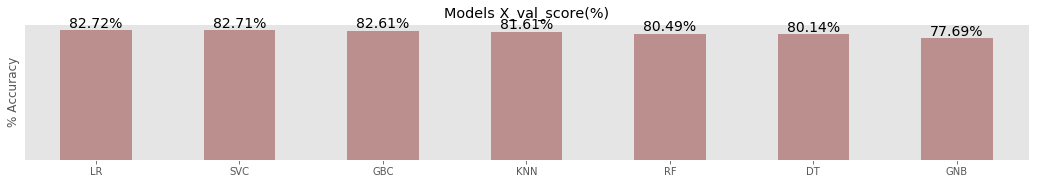

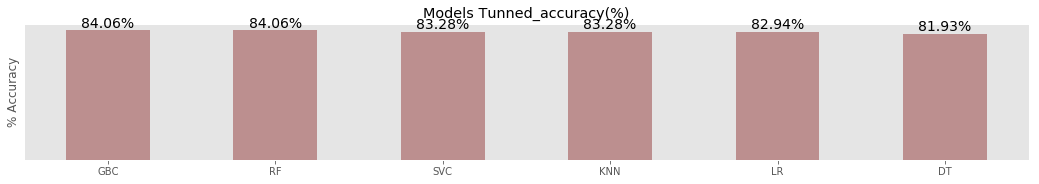

In [106]:
'''Compare cross validation scores with tunned scores to find the best model.'''
compare_scores(sorted_x_val_score)
compare_scores(sorted_tunned_scores)

**Findings:** Among the classifiers, RF and GBC have the highest accuracy after  tunning hyperparameters. So RF and GBC are perhaps worthy of further study on this classification problem. Hence we choose RF and GBC.

**Note:** Please note that if we chose our classifier based on cross validation scores, we would not get RF and GBC as our best classifiers instead we would end up choosing LR and SVC. So it is recommended to select best classifiers based on accuracy after tunning hyperparameters though its computationally intensive.

## 11.5 Train & Predict Using Best Hyperparameters <a id="11.5"></a>
So we have our best classifiers with their best hyperparameters. Let's train our best two classifiers and then predict using them.

In [107]:
"""Train and predict using rf's best hyperparameters."""
rf = RandomForestClassifier(**rf_best_params)
rf.fit(X_train, y_train)
y_pred_rf_tunned = rf.predict(X_test)

"""Train and predict using gbc's best hyperparameters."""
gbc = GradientBoostingClassifier(**gbc_best_params)
gbc.fit(X_train, y_train)
y_pred_gbc_tunned = gbc.predict(X_test)

## 11.6 Feature Importance <a id="11.6"></a>
Let's visualize the features importance given by the two classifiers.

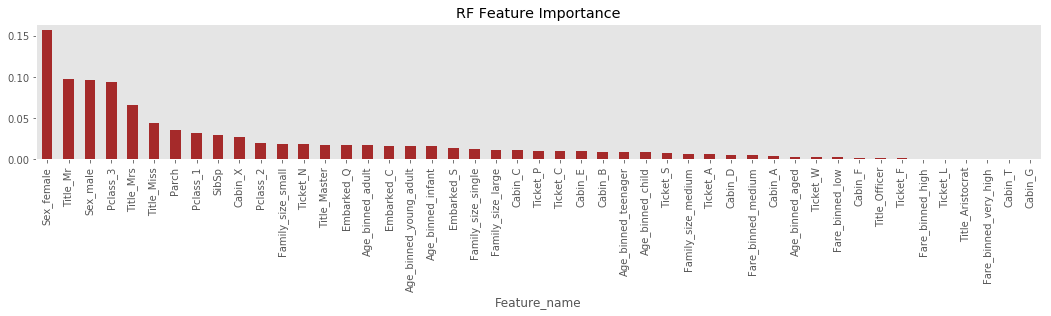

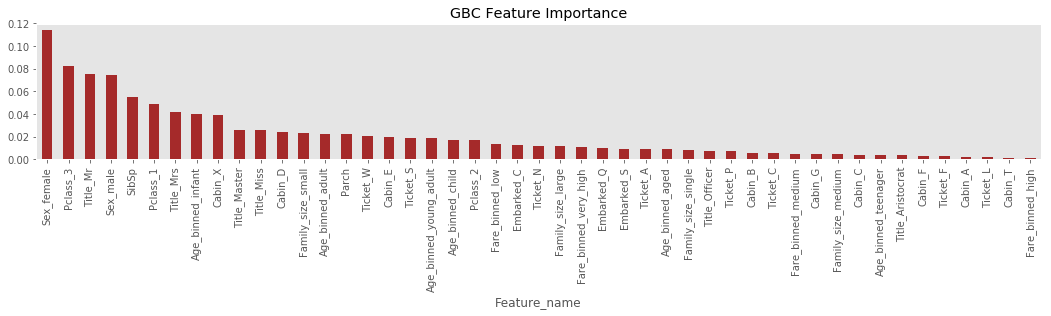

In [108]:
'''Plot feature importance by rf and gbc.'''
plot_feature_importance(rf)
plt.title('RF Feature Importance')
plt.show()

plot_feature_importance(gbc)
plt.title('GBC Feature Importance')
plt.show()

**Findings:** Looks like both RF and GBC give zero(0) importances to features Cabin_T, Cabin_G, Ticket_L, Fare_binned_high, Title_Aristocrat. Also GBC selects less features than RF for this classification task for train itself.

## 11.7 Learning Curves  <a id="11.7"></a>
Let's plot the learning curves for the two classifiers to see their bias-variance tradeoff.

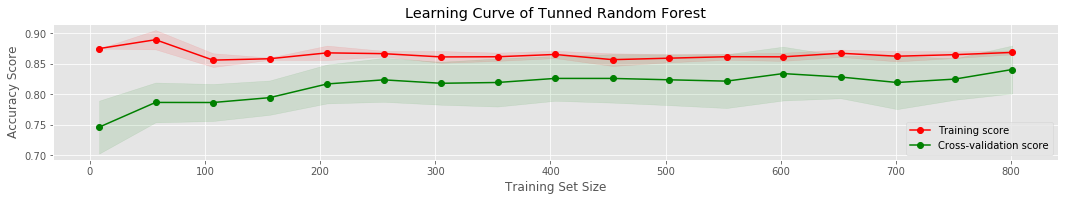

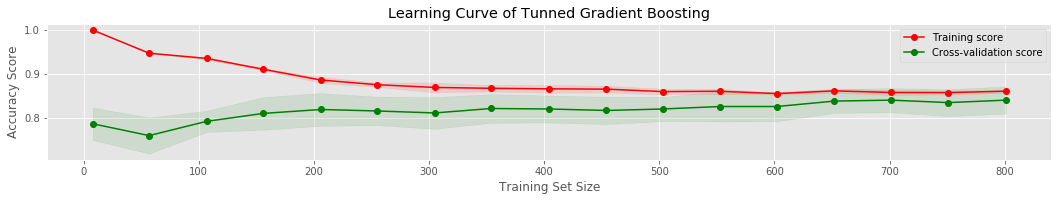

In [109]:
'''Plot learning curves of best rf classifier.'''
plot_learning_curve(rf)
plt.title('Learning Curve of Tunned Random Forest')
plt.show()

'''Plot learning curve of best gbc.'''
plot_learning_curve(gbc)
plt.title('Learning Curve of Tunned Gradient Boosting')
plt.show()

** RF's learing curve indicates it is just doing okay and since the two curves have not yet converged adding more instances (rows) might help.**


** On the other hand, learning curve of gbc indicates a little bit high bias or low variance (underfitting) and as the curves haven't yet converged, adding more training data just might not help. Rather adding more features and increasing model's complexity might help.**

# 12.More Evaluation Metrics  <a id="12"></a>
We've so far used accuracy score to evaluate our classifiers. But sometimes accuracy score isn't all enough to evaluate a classifier properly as accuracy score doesn't tell exactly which class (positive or negative) is being wrongly classified by our classifier in case of low accuracy score. **Again for imbalanced classification problem, accuracy score isn't the best metric to choose between different classifiers.** To clarify this, in this section, we will calculate confusion matrix, precision score, recall score, specificity, f1 score, classification report for both random forest and gradient boosting classifier. And then we will compare our two classifiers using these calculated metrics to see exactly where one classifier excels the other.

In [110]:
'''Return prediction to use it in another function.'''
def x_val_predict(model):
    from sklearn.model_selection import cross_val_predict
    predicted = cross_val_predict(model, X_train, y_train, cv = 10)
    return predicted # Now we can use it in another function by assigning the function to its return value.

'''#1.Confusion matrix.'''
def confusion_matrix(model):
    predicted = x_val_predict(model)
    confusion_matrix = pd.crosstab(y_train, predicted, rownames = ['Actual'], colnames = ['Predicted/Classified'], margins = True) # We use pandas crosstab
    return display(confusion_matrix)

'''#2.Precision score.'''
def precision_score(model):
    from sklearn.metrics import precision_score
    predicted = x_val_predict(model)
    precision_score = precision_score(y_train, predicted)
    return display(precision_score)

'''#3.Recall score.'''
def recall_score(model):
    from sklearn.metrics import recall_score
    predicted = x_val_predict(model)
    recall_score = recall_score(y_train, predicted)
    return display(recall_score) 

'''#4.Specificity score.'''
def specificity_score(model):
    from sklearn.metrics import confusion_matrix
    predicted = x_val_predict(model)
    tn, fp, fn, tp = confusion_matrix(y_train, predicted).ravel()
    specificity_score = tn / (tn + fp)
    return display(specificity_score)

'''#5.F1 score.'''
def f1_score(model):
    from sklearn.metrics import f1_score
    predicted = x_val_predict(model)
    f1_score = f1_score(y_train, predicted)
    return display(f1_score)

'''#6.Classification report.'''
def classification_report(model):
    from sklearn.metrics import classification_report
    predicted = x_val_predict(model)
    classification_report = classification_report(y_train, predicted)
    return print(classification_report)

'''#7.Plot precision-recall vs threshold curve.'''
def precision_recall_vs_threshold(model):
    from sklearn.metrics import precision_recall_curve
    probablity = model.predict_proba(X_train)[:, 1]
    precision, recall, threshold = precision_recall_curve(y_train, probablity)
    plt.figure(figsize = (18, 4))
    plt.plot(threshold, precision[:-1], 'b-', label = 'precision', lw = 3.7)
    plt.plot(threshold, recall[:-1], 'g', label = 'recall', lw = 3.7)
    plt.xlabel('Threshold')
    plt.legend(loc = 'best')
    plt.ylim([0, 1])
    
'''#8.Plot recall vs precision curve.'''
def plot_precision_vs_recall(model):
    from sklearn.metrics import precision_recall_curve
    probablity = model.predict_proba(X_train)[:, 1]
    precision, recall, threshold = precision_recall_curve(y_train, probablity)
    plt.figure(figsize = (18, 5))
    plt.plot(recall, precision, 'r-', lw = 3.7)
    plt.ylabel('Recall')
    plt.xlabel('Precision')
    plt.axis([0, 1.5, 0, 1.5])

'''#9.Plot ROC curve with AUC score.'''
def plot_roc_and_auc_score(model):
    from sklearn.metrics import roc_curve, roc_auc_score
    probablity = model.predict_proba(X_train)[:, 1]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, probablity)
    auc_score = roc_auc_score(y_train, probablity)
    plt.figure(figsize = (18, 5))
    plt.plot(false_positive_rate, true_positive_rate, label = "ROC CURVE, AREA = "+ str(auc_score))
    plt.plot([0, 1], [0, 1], 'black', lw = 3.7)
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.axis([0, 1, 0, 1])
    plt.legend(loc = 4)

## 12.1 Confusion Matrix  <a id="12.1"></a>
The confusion matrix shows the number of correct classifications along with misclassifications when a classifier make predictions for each class (positive or negative). The diagonal elements are correct classification while the off diagonal elements are misscalssifications. Some basic terms associated with confusion matrix:
1. True positives (TP): These are cases in which we predicted 1(yes), and the actual is also 1(yes).
2. True negatives (TN): We predicted 0(no), and the actual is also 0(no).
3. False positives (FP): We predicted 1(yes), but the actual is 0(no). (Also known as a "Type I error.")
4. False negatives (FN): We predicted 0(no), but the actual is 1(yes). (Also known as a "Type II error.")

In [111]:
'''Calculate confusion matrix of rf and gbc.'''
confusion_matrix(rf)
confusion_matrix(gbc)

Predicted/Classified,0,1,All
Actual,,,
0,504,45,549
1,97,245,342
All,601,290,891


Predicted/Classified,0,1,All
Actual,,,
0,492,57,549
1,85,257,342
All,577,314,891


The 1st row of our confusion matrix( or sometimes called error matrix) is about the negative class (because of 0 and hence non-survived) and The 2nd row of our confusion matrix( or sometimes called error matrix) is about the positive class (because of 1 and hence survived).

For rf, passengers correctly classified as survived are 245 (true positives) and passengers correctly classified as non-survived (died) are 504(true negatives). While 45 passengers (false positives) from class 0 (non-survived) were misclassified as survived and 97 (false negatives) passengers who actually survived were classified as non-survived.

And for gbc, passengers correctly classified as survived are 257 (true positives) and passengers correctly classified as non-survived (died) are 492(true negatives). While 57 (false positives) passengers from class 0 (non-survived) were misclassified as survived and 85 (false negatives) passengers who actually survived were misclassified as non-survived.

**RF (749) makes exactly same correct predictions (true positives+true negatives) as gbc (749), hence rf and gbc have exactly same accuracy score that we saw when we calculated both model's accuracy score.**

## 12.2 Precision Score  <a id="12.2"></a>
Precision is the ratio of true positive to total predicted positive(true positive + false positive). So precision score tells how many true positives our model can capture out of total predicted positives.

In [112]:
'''Compute precision score for rf and gbc.'''
precision_score(rf)
precision_score(gbc)

0.8448275862068966

0.8184713375796179

**RF's precision score tells when it predicts a passenger as a survivor (=class1), it is correct nearly 84.5% of the time. And gbc's precision score tells when gbc predicts a passenger as a survivor, it is correct nearly 82% of the time. So rf has a better precision score than gbc.**

## 12.3 Recall (or Sensitivity or True Positive Rate)  <a id="12.3"></a>
Recall is the ratio of true positive to total actual positive(true positive + false negative). So recall score basically calculates true positives from total actual positives.

In [113]:
'''Compute recall score for rf and gbc.'''
recall_score(rf)
recall_score(gbc)

0.716374269005848

0.7514619883040936

** RF's recall score tells it correctly identifies over 71.5% of all the survivors. Or put another way, it predicts over 71.5% of the survivors as a survivor. On the other hand, gbc predicts just over 75% of the survivors as survivor. So gbc is more capable of capturing true positives than rf that we also observed from confusion matrix.**

## 12.4 Specificity ( or True Negative Rate)  <a id="12.4"></a>
Specificity is the ratio of true negative to total actual negative(true negative + false positive). Specificity  is exactly the opposite of recall. So specificity score basically calculates true negatives from total actual negatives.


In [114]:
'''Calculate specificity score for rf and gbc.'''
specificity_score(rf)
specificity_score(gbc)

0.9180327868852459

0.8961748633879781

**RF's specificity score indicates it correctly predicts nearly 92% of the victims as a victim. Comparing recall score with specificity, it looks like our rf model is more accurate on predicting negative class (victims = 0) than predicting positive class (survivors = 1).**

**While  gbc's specificity score indicates it correctly predicts over 89.5% of the victims as a victim. Comparing recall score with specificity, it looks like our gbc also is more accurate on predicting negative class (victims = 0) than predicting positive class (survivors = 1).**

**Interesting! RF is better than capturing true negatives than gbc. So if we were to choose a model between rf and gbc where our priority is the negative class (0), we would choose rf. And if our priority is positive class(1), we would choose gbc.**

## 12.5 F1 Score  <a id="12.5"></a>
We can't choose classifiers solely depending on their precision or recall score. Rather we need to consider both to find out the best classifiers. Here comes the f1 score which is  the balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the f1 score is, the better.

In [115]:
'''Calculate f1 score for rf and gbc.'''
f1_score(rf)
f1_score(gbc)

0.7753164556962026

0.7835365853658537

**Looks like gbc is better than rf in terms of f1 score.**
## 12.6 Classification Report  <a id="12.6"></a>
Precision, recall, and f1 score is only associated with true positives. But what if we want to measure true negatives? We can measure them with true positives and count of each class (0 and 1) in  a classification report. It provides precision, recall, f1 score and class count altogether for both classs (0 and 1) but at the cost of less hassle.

In [116]:
'''Calculate classification report for rf and gbc.'''
classification_report(rf)
classification_report(gbc)

             precision    recall  f1-score   support

          0       0.84      0.92      0.88       549
          1       0.84      0.72      0.78       342

avg / total       0.84      0.84      0.84       891

             precision    recall  f1-score   support

          0       0.85      0.90      0.87       549
          1       0.82      0.75      0.78       342

avg / total       0.84      0.84      0.84       891



**We can see precision, recall, f1 score and class count for both class (0 and 1) of our two models.**
## 12.7 Precision-Recall vs Threshold Curve  <a id="12.7"></a>
Sometimes we want a high precision and sometimes a high recall depending on our classification problem. The thing is that an increasing precision results in a decreasing recall and vice versa. This is called the precision-recall tradeoff that can be illustrated using precision-recall curve as a function of the decision threshold.

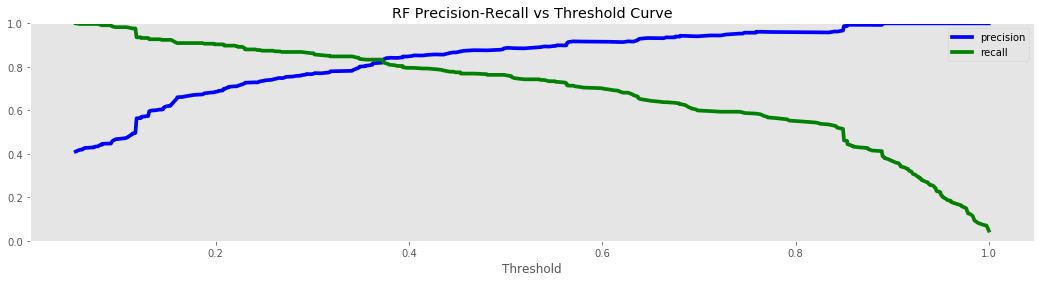

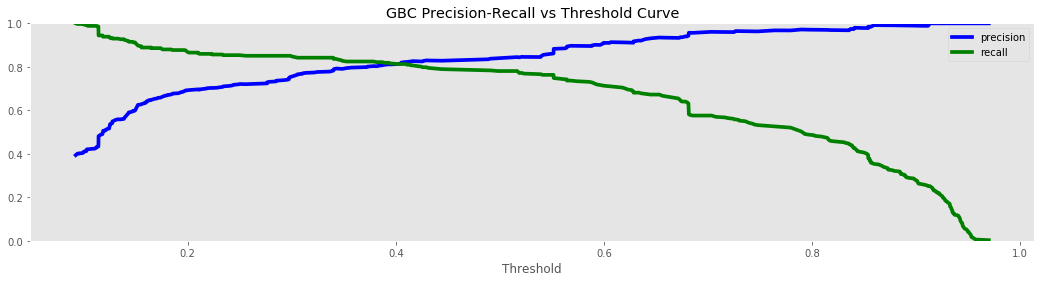

In [117]:
'''Plot precision-recall vs threshold curve for rf and gbc.'''
precision_recall_vs_threshold(rf)
plt.title('RF Precision-Recall vs Threshold Curve')
plt.show()

precision_recall_vs_threshold(gbc)
plt.title('GBC Precision-Recall vs Threshold Curve')
plt.show()

**We can see for RF, the recall falls quickly at a precision of around 84%. So therefore, we need to select the precision-recall tradeoff before 84% of precision which could be at around 82%. Now, for example, if we want a precision of 80% off RF we would need a threshold of around 0.37**

**On the other hand, for GBC, the recall falls fast at a precision of around 84% and hence we would select precision-recall tradeoff at around 80% of precision. If we want a precision of around 81% off GBC, we would need a threshold of around 0.40**

## 12.8 Precision-Recall Curve  <a id="12.8"></a>
We can also plot precision against recall to get an idea of precision-recall tradeoff where y-axis represents precision and x-axis represents recall. In my plot, I plot recall on y-axis and precision on x-axis.

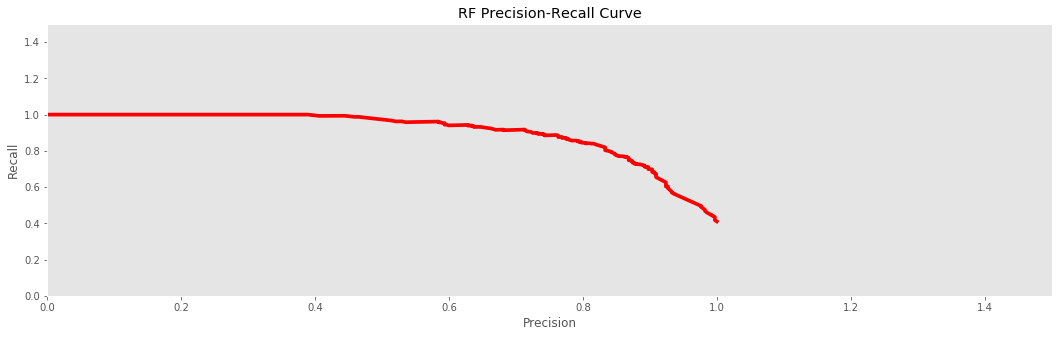

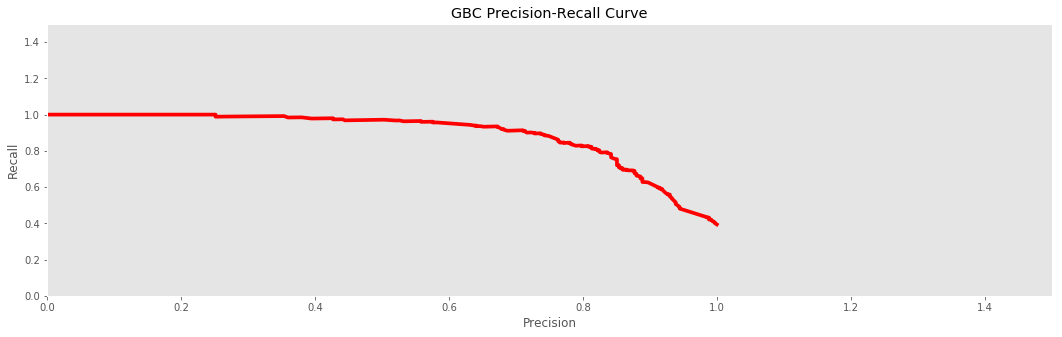

In [118]:
'''Plot recall vs precision curve of rf and gbc.'''
plot_precision_vs_recall(rf)
plt.title('RF Precision-Recall Curve' )
plt.show()

plot_precision_vs_recall(gbc)
plt.title('GBC Precision-Recall Curve' )
plt.show()

**We can see rcall falls rapidly at around a precision of 0.84 for both RF and GBC that we've observed in the previous section.**

## 12.9 ROC  Curve & AUC Score  <a id="12.9"></a>
ROC (Reicever Operating Characteristic Curve) is a plot of the true positive rate against the false positive rate of a classifier. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity). AUC (Area under the ROC Curve) score is the corresponding score to the AUC Curve. It is simply computed by measuring the area under the ROC curve, which is called AUC. We will plot ROC curve and AUC score together for our two classifiers.

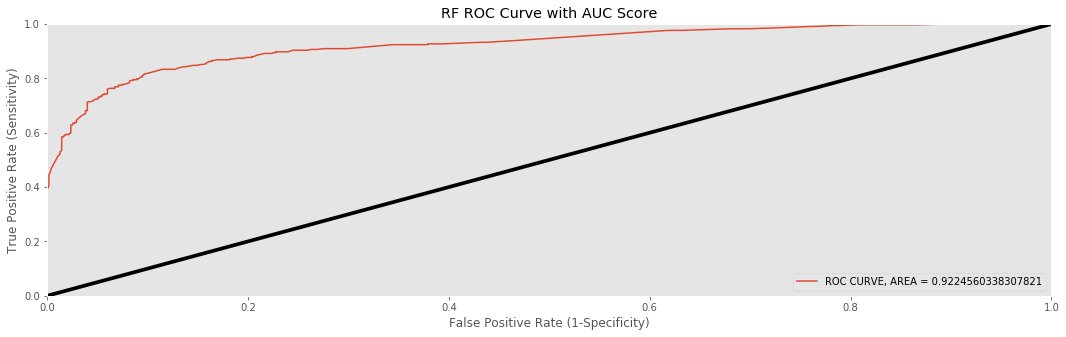

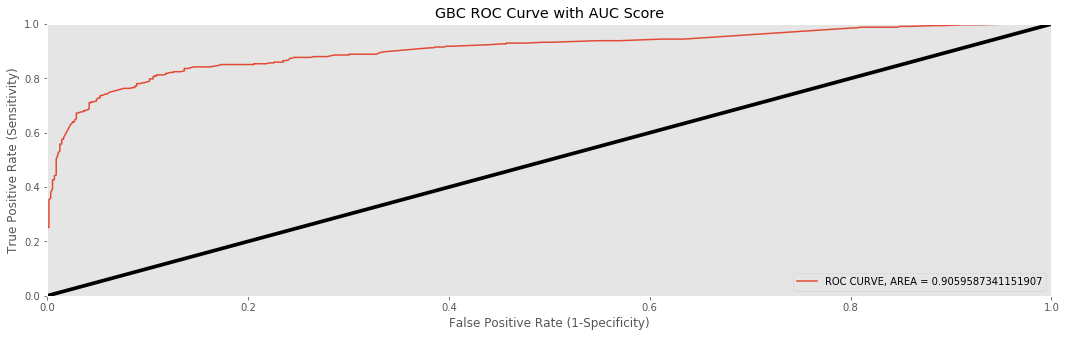

In [119]:
'''Plot roc curve and auc score for rf and gbc.'''
plot_roc_and_auc_score(rf)
plt.title('RF ROC Curve with AUC Score')
plt.show()

plot_roc_and_auc_score(gbc)
plt.title('GBC ROC Curve with AUC Score')
plt.show()

This two plots tells few different things:

1. A model that predicts at chance will have an ROC curve that looks like the diagonal black line. That is not a discriminating model.

2. The further the curve is from the diagonal black line, the better the model is at discriminating between positives and negatives in general.

3. There are useful statistics that can be calculated from this curve, like the Area Under the Curve (AUC). This tells you how well the model predicts and the optimal cut point for any given model (under specific circumstances).

**Comparing the two ROC curves, we can see the distance between black and red line of RF is greater than the distance between black and red line of GBC. Hence it can safely be said that RF, in general, is better at discriminating between positives and negatives than GBC. Also RF(~92.25%) auc score (which is the area under the roc curve) is greater than gbc(~90.6%). It seems the higher the area, the further the classifier is from the black diagonal line and vice versa and hence more accurate. Since RF has more area under the ROC curve than GBC, RF is more accurate.**

# 13.Submission  <a id="13"></a>
We will create two prediction files in csv format using RF and GBC classifier for kaggle submission.

In [120]:
'''Submission with the most accurate random forest classifier.'''
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_rf_tunned})
submission.to_csv('submission_rf.csv', index = False)


'''Submission with the most accurate gradient boosting classifier.'''
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_gbc_tunned})
submission.to_csv('submission_gbc.csv', index = False)

**RF scored 0.79425 while GBC scored 0.78468 on kaggle leaderboard.**

**If you're still with me, I congratulate you because you've learned all those things that I learned after months of study, practice and of course patience.** 

# 14.End Note <a id="14"></a>
**Of course, there is always room for improvement. I'm still learning. I've tried to explain everything I could possibly know. Any suggestion is cordially welcomed. And if you find my kernel useful, please upvote me which will keep me inspired.**